# Initialize

In [127]:
import os
from time import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('..\\')
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
from scresonators.fit_resonator.ana_resonator import ResonatorData
import csv
from datetime import datetime
from scresonators.measurement import vna_measurement
from scresonators.measurement import helpers
from scresonators.measurement import vna_scan
%load_ext autoreload
%autoreload 2

helpers.config_figs()

import scresonators.measurement.vna_measurement
from scresonators.measurement.ZNB import ZNB20

#VNA = ZNB20(address='10.108.30.65') # Stanford
VNA = ZNB20(address='192.168.137.84') # SLAC

## Daily measurement settings
warm_att = 0 #dB
cold_att = 50

spar = 's21'
base_path = r'G:/My Drive/Projects/Materials/Data/250518-ResSilSQ2/'

# spar = 's43'
# base_path = r'G:/My Drive/Projects/Materials/Data/250518-ResSilTa3_cooldown2'

# spar = 's43'
# base_path = r'G:/My Drive/Projects/Materials/Data/250605_check_lines/'


if not os.path.exists(base_path):
    os.makedirs(base_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
VNA.reset()

# Single power scans

## Single scan

Calculated line delay: 1.6511799701787626e-07


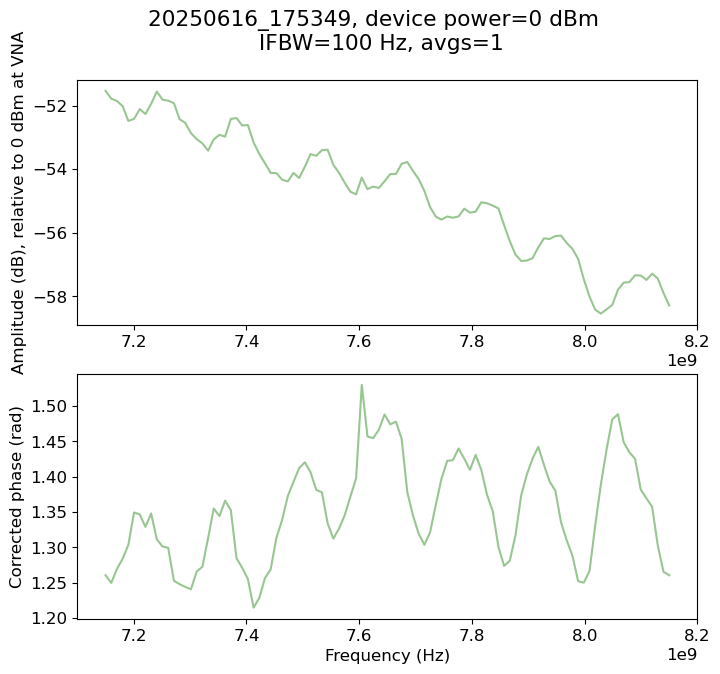

In [142]:
expt_path = base_path
scan_def = {'freq_center':7.65e9, 
            'span':1e9,  
            'bandwidth':100, 
            'power':0, 
            'npoints':100, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 's21_switch_atten'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

# 5.986213520, 6.264641450, 6.418856885, 6.570072000, 6.8067, 7.085925, 7.1553305, 7.3837534, 7.589974, 7.754795

## Check resonances at one power

Calculated line delay: -4.1711520558816326e-07


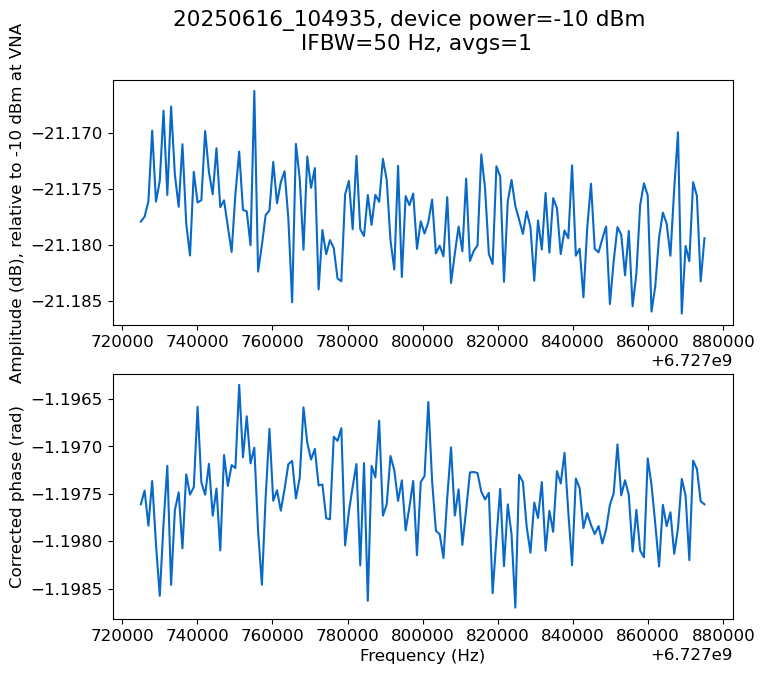

Calculated line delay: -4.1139408808953317e-07


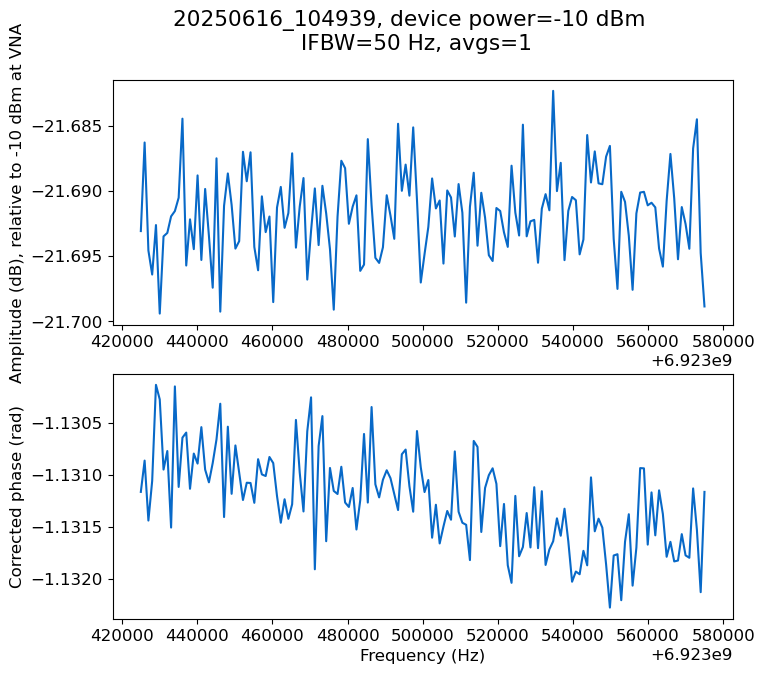

Calculated line delay: -4.1767648774778894e-07


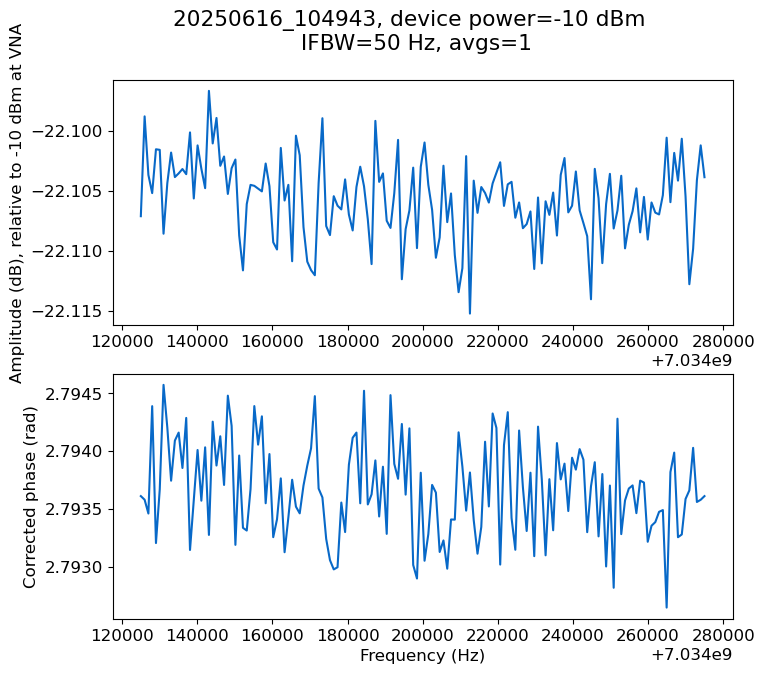

In [89]:
%matplotlib inline
expt_path = base_path
npoints = 150
span=0.15e6
power = -10

freqs = np.array([6.0175e+09, 6.3510e+09, 6.7120e+09, 7.0296e+09, 7.1744e+09, 7.5467e+09])
freqs =np.array([6.7278e+09, 6.9235e+09, 7.0342e+09])
bandwidth=50
avgs=1
for freq_center in freqs:     
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

# Get the phase to correct with 

Calculated line delay: -8.263375470332096e-07


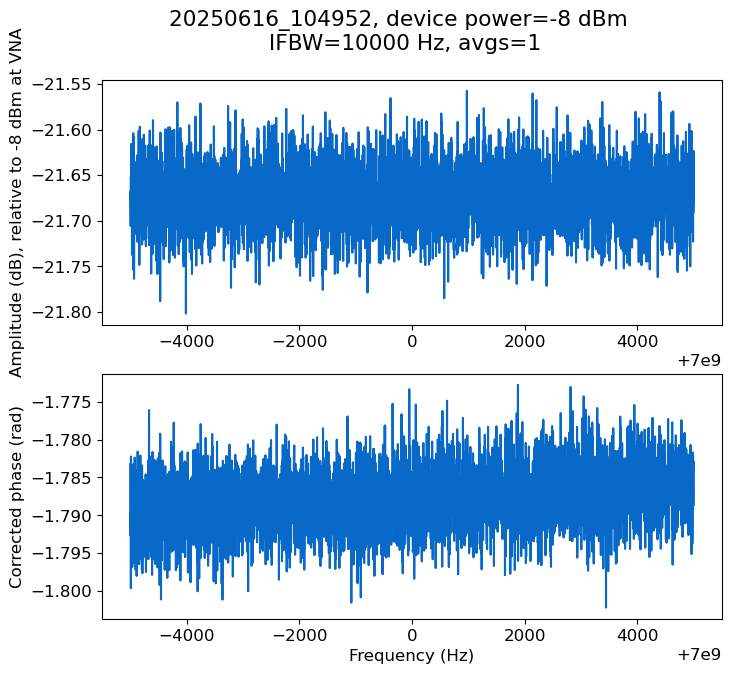

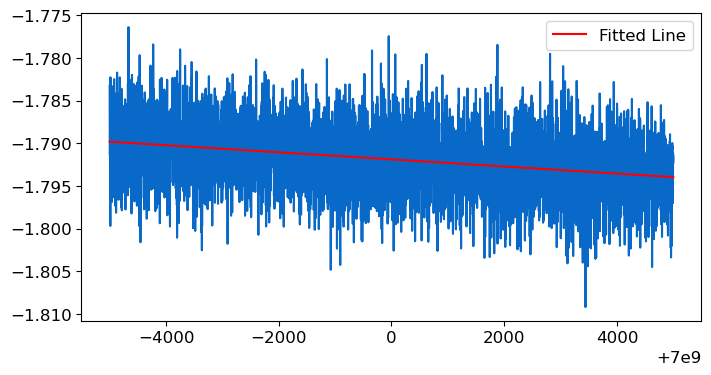

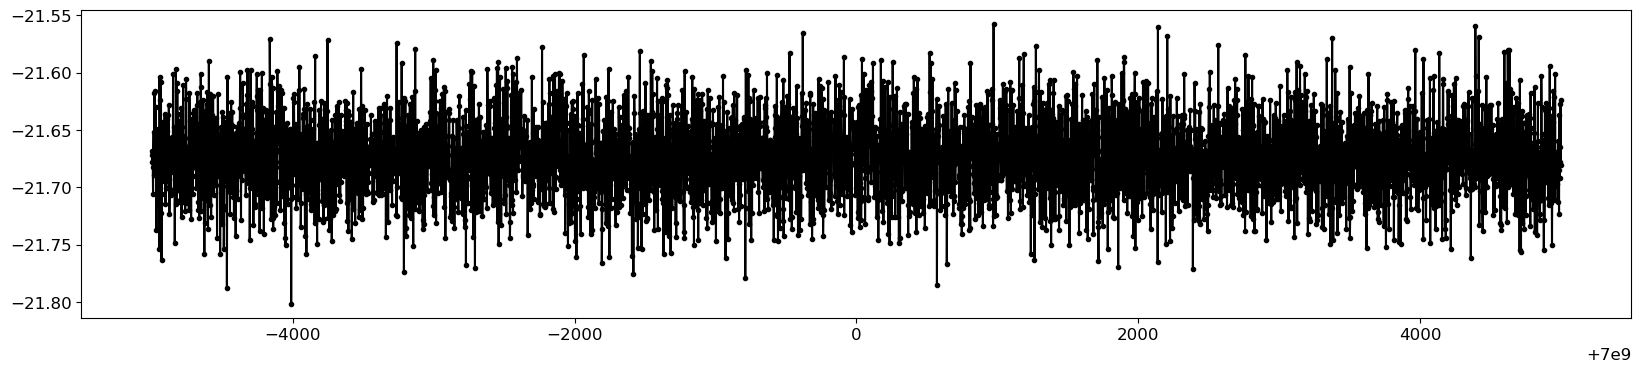

In [90]:
from scipy.stats import linregress

npoints = 5000
span=1e4
power = -8

bandwidth=10000
freq_center = 7e9
avgs=1    
scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
file_name = 'phase_check_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
data=vna_scan.do_vna_scan(VNA, file_name, base_path, scan_def, spar)

plt.figure()
plt.plot(data['freqs'], np.unwrap(data['phases']))

# Fit the data to a line
slope, intercept, r_value, p_value, std_err = linregress(data['freqs'], np.unwrap(data['phases']))

# Plot the fitted line
plt.plot(data['freqs'], slope * data['freqs'] + intercept, label='Fitted Line', color='red')
plt.legend()
plt.show()


plt.figure(figsize=(20, 4))
plt.plot(data['freqs'], data['amps'],'k.-')
#config.update_config(cfg_path, 'readout', qi, 'phase_const', slope)

In [92]:
slope

-4.1545782482711315e-07

# Run all these cells to do power sweep

## Broad frequency scan looking for resonances 

In [93]:
expt_path = base_path
span=40e6
power = 0
avgs = 3
d=[]
bandwidth=5000
freq_min=5.6e9
freq_max = 8.1e9 
nscans = int(np.ceil((freq_max - freq_min)/span))
for i in range(nscans):
    freq_center = freq_min + i*span
    scan_def = {'freq_center':freq_center, 
                'span':span,  
                'bandwidth':bandwidth, 
                'power':power, 
                'npoints':7500, 
                'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    d.append(vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar, plot=False))

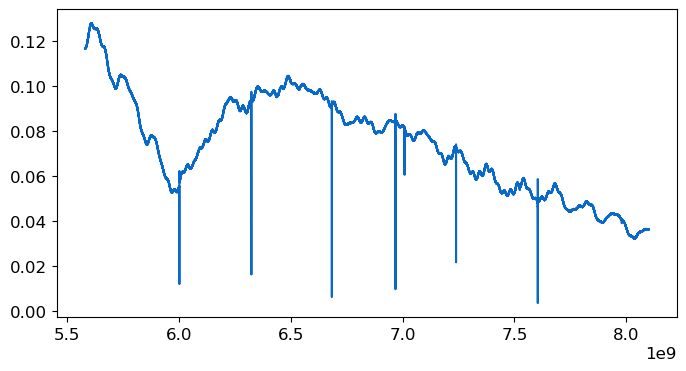

In [94]:
dd = helpers.concat_scans(d)
dd['amps'] = helpers.make_lin(dd['amps'])
plt.figure()
plt.plot(dd['freqs'],dd['amps'])

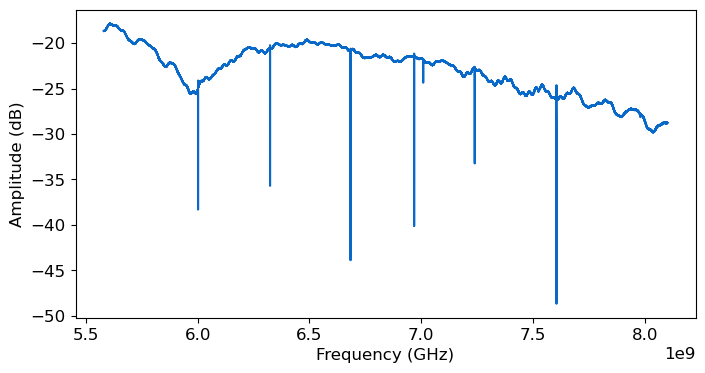

In [95]:
dd_db = helpers.concat_scans(d)
plt.figure()
plt.plot(dd_db['freqs'],dd_db['amps'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.savefig('amp_vs_freq_4.png')

9


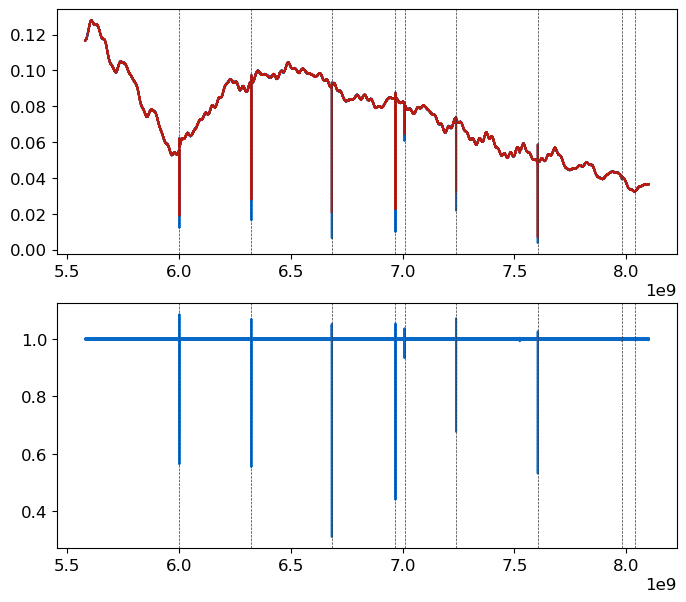

In [99]:
data = helpers.find_peaks(dd, 0.0075)
print(len(data['coarse_peaks']))

In [100]:
res_list = data['coarse_peaks']
#res_list = data['coarse_peaks'][0:6]

In [ ]:

res_list = np.delete(res_list, 2)

In [23]:
res_list = np.append(res_list, 8.018e9)

## Medium width scan checking each resonance 
Saves the minimum value of transmission to res_freqs for narrower scan next. 

Calculated line delay: -4.0326073873260086e-07


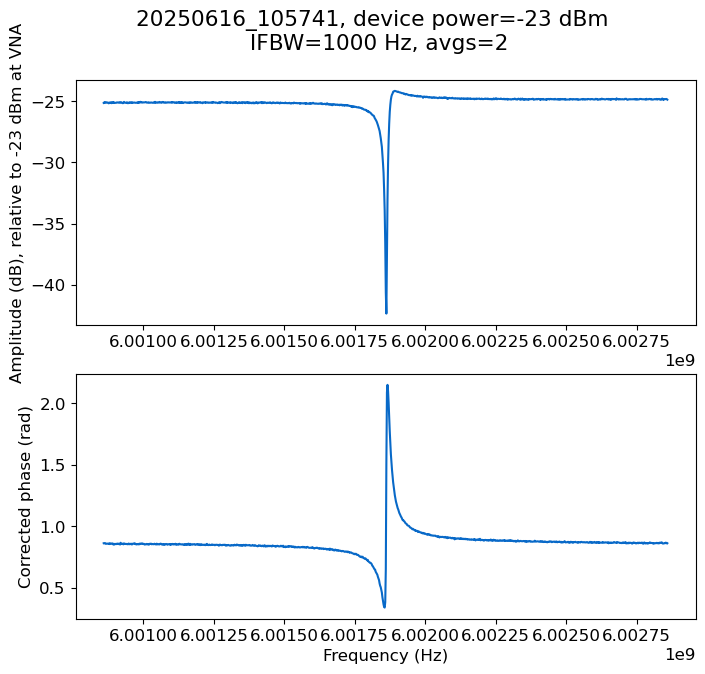

Calculated line delay: -4.0495948441050565e-07


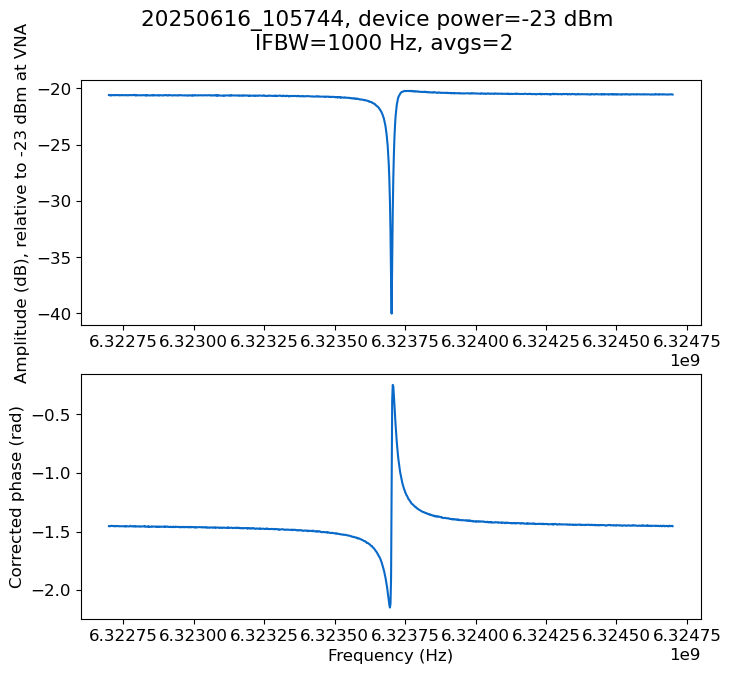

Calculated line delay: -3.978888771462818e-07


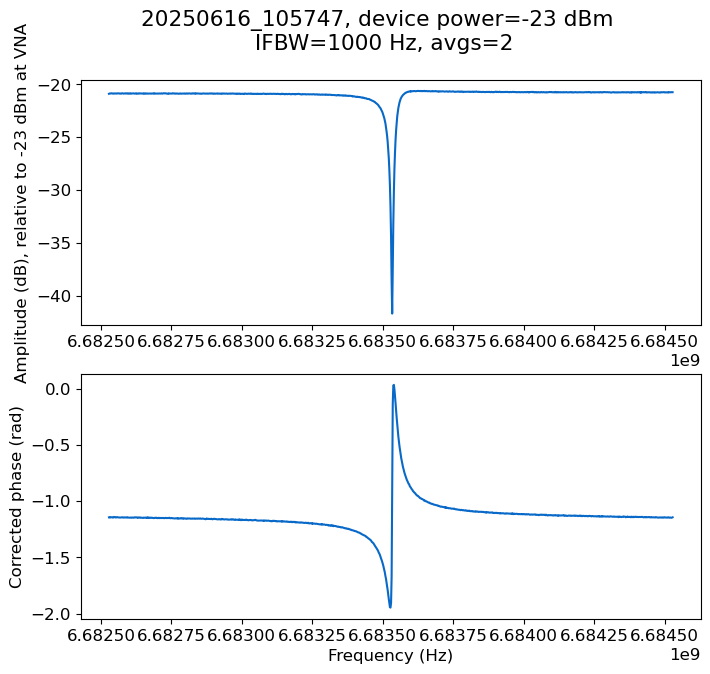

Calculated line delay: -4.051975366415823e-07


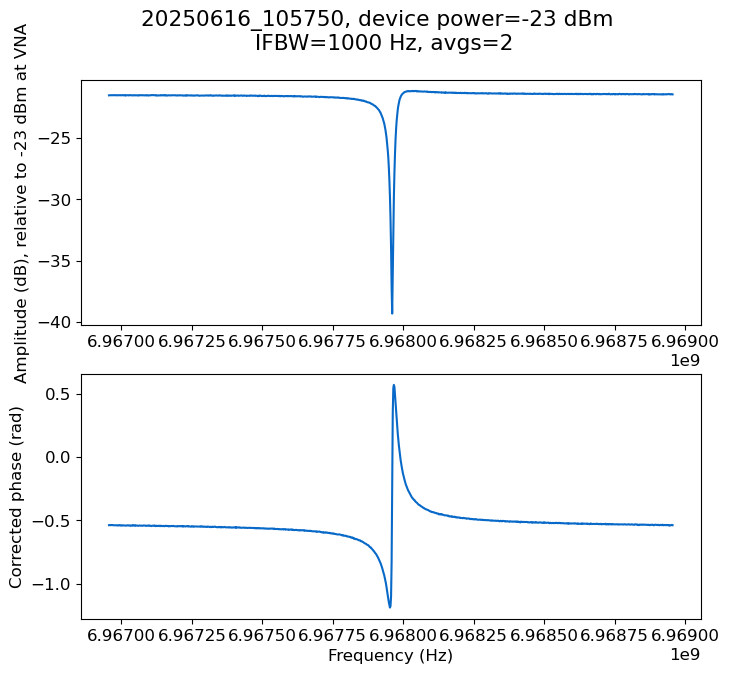

Calculated line delay: -4.1800640985818304e-07


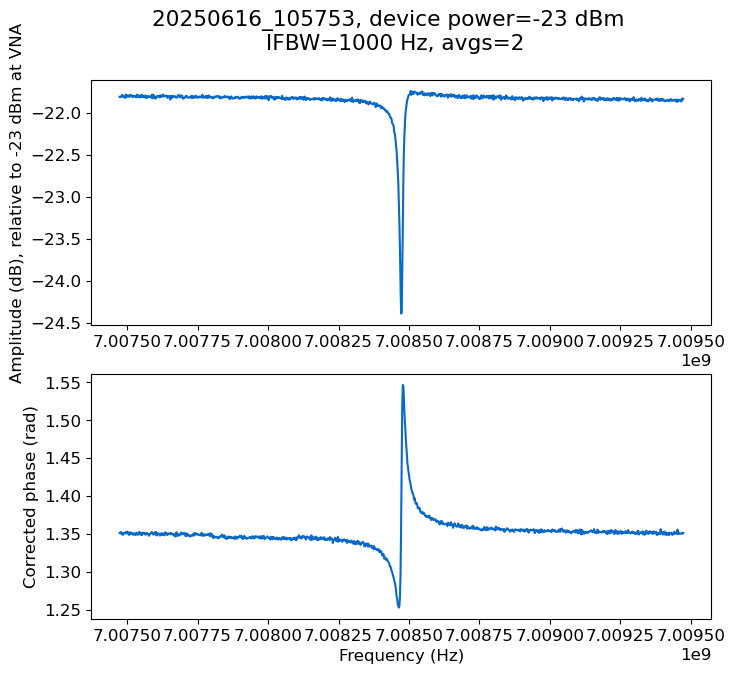

Calculated line delay: -4.126898049291853e-07


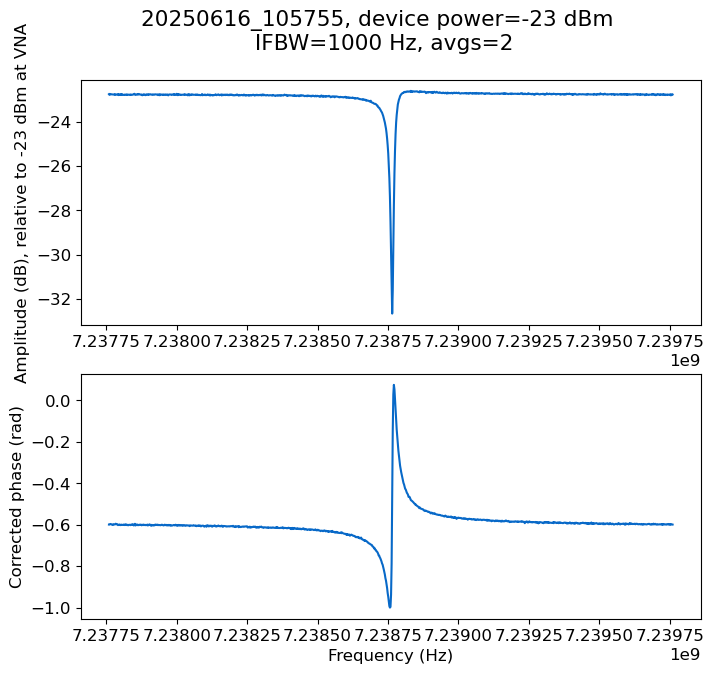

Calculated line delay: -3.8520226230807677e-07


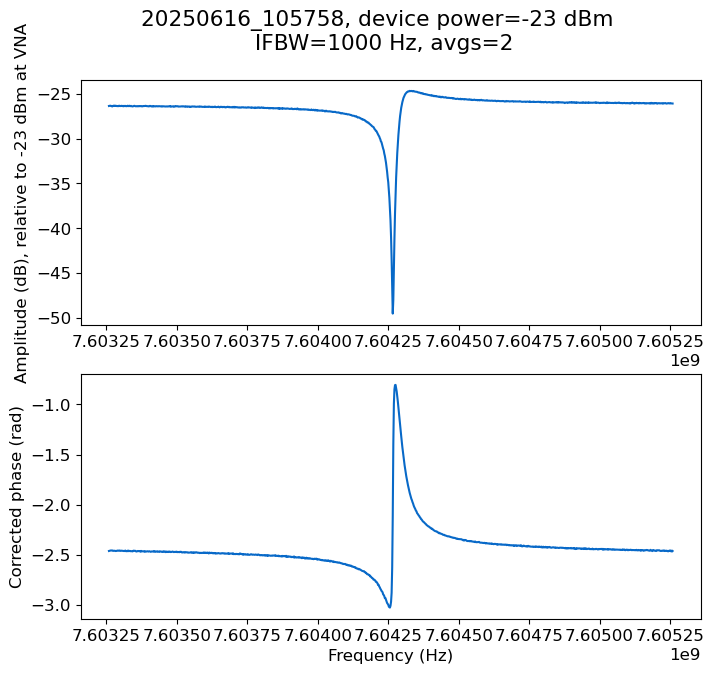

Calculated line delay: -4.178225363120524e-07


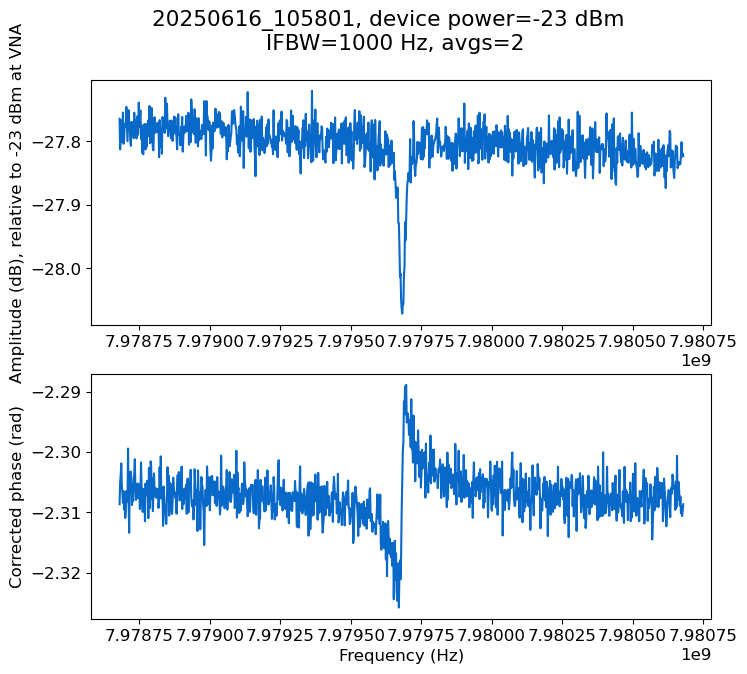

Calculated line delay: -4.1331718176705815e-07


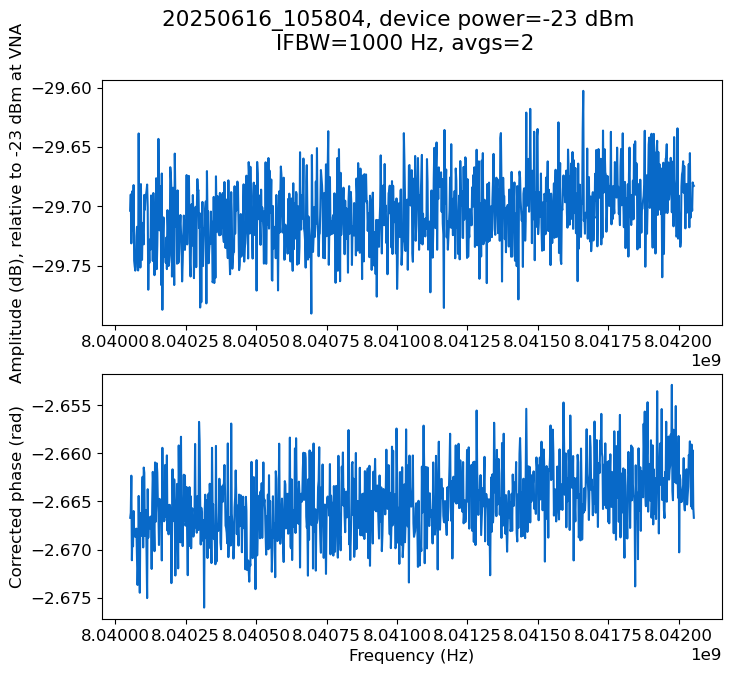

In [101]:
expt_path = base_path
span=2e6
res_freqs =[]
power=-10
temp=0.01


for freq_center in res_list:
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':1000, 'power':-23, 'npoints':1000, 'averages':2}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_' + str(temp) + 'K'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    res_freqs.append(data['freqs'][np.argmin(data['amps'])])

## Narrower scan before power sweep

In [ ]:
freq_list =[]
import copy 
scan_def['span']=1e5
scan_def['power']=-10
for res in res_freqs:
    scan_def['freq_center'] = res
    file_name = 'res_' + str(scan_def['freq_center'])[:7] + '_' + str(power)[1:] + 'dbm'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    freq_list.append(data['freqs'][np.argmin(data['amps'])])
res_freqs=copy.deepcopy(freq_list)

In [103]:
res_list=res_list[0:-1]
print(res_list)

[6.0019e+09 6.3237e+09 6.6835e+09 6.9680e+09 7.0085e+09 7.2388e+09
 7.6043e+09 7.9797e+09]


In [27]:
freq_list

[6004000869.385187,
 6328492134.887255,
 6681207832.048611,
 7026329179.82658,
 7247004608.422264,
 7604966331.446795,
 8017990990.990991]

# Power sweep

Comment saved to G:/My Drive/Projects/Materials/Data/250518-ResSilSQ2/power_sweep_20250616_191200\comment.txt


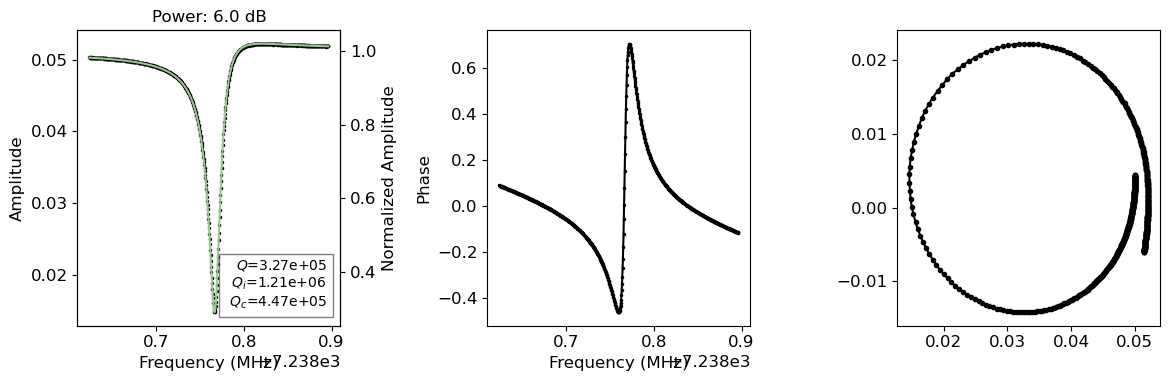

Time elapsed: 0.55 min, expected time: 0.24 min


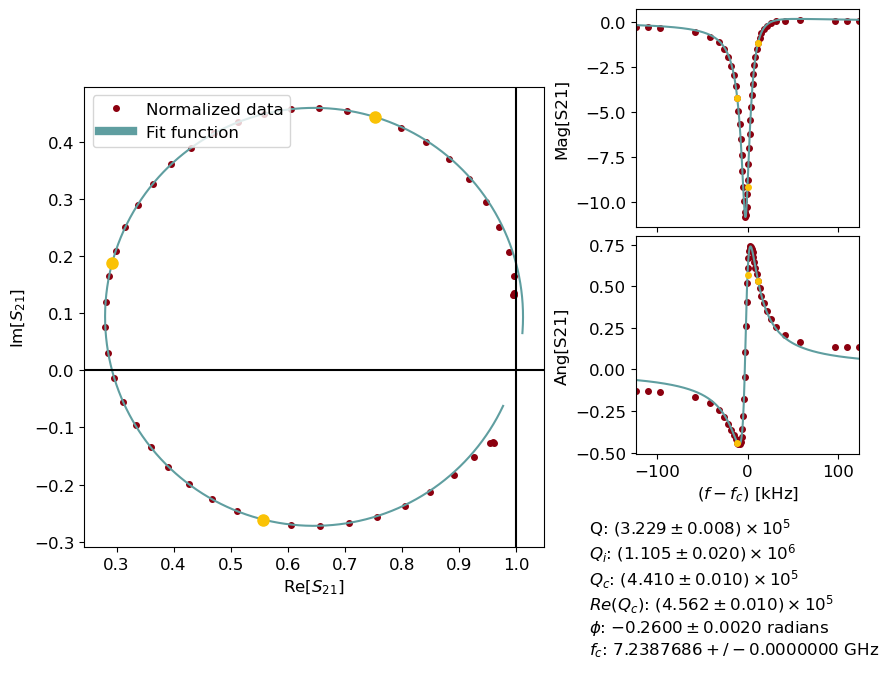

Saved fit results for frequency 7238.769000 MHz, power 6 dBm to CSV
Averaging factor: 0.001
Pin -70.0, N photons: 5.21e+07, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.55 min, expected time: 0.24 min


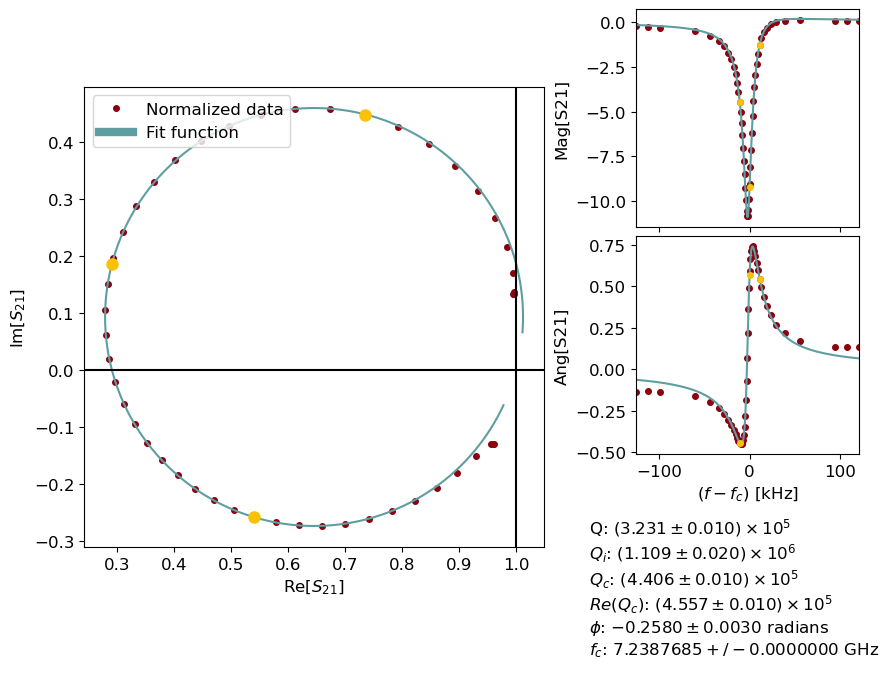

Saved fit results for frequency 7238.769000 MHz, power 3 dBm to CSV
Averaging factor: 0.002
Pin -73.0, N photons: 2.61e+07, navg: 0
Next time: 0.00 min, q_adj: 1.000
Time elapsed: 0.55 min, expected time: 0.24 min


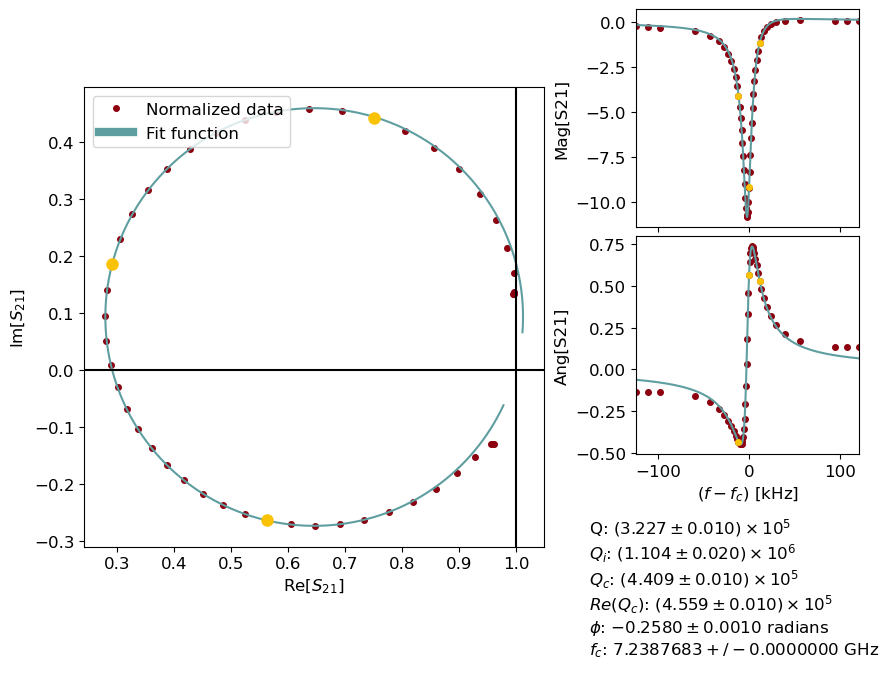

Saved fit results for frequency 7238.768000 MHz, power 0 dBm to CSV
Averaging factor: 0.003
Pin -76.0, N photons: 1.31e+07, navg: 0
Next time: 0.00 min, q_adj: 0.999
Time elapsed: 0.54 min, expected time: 0.24 min


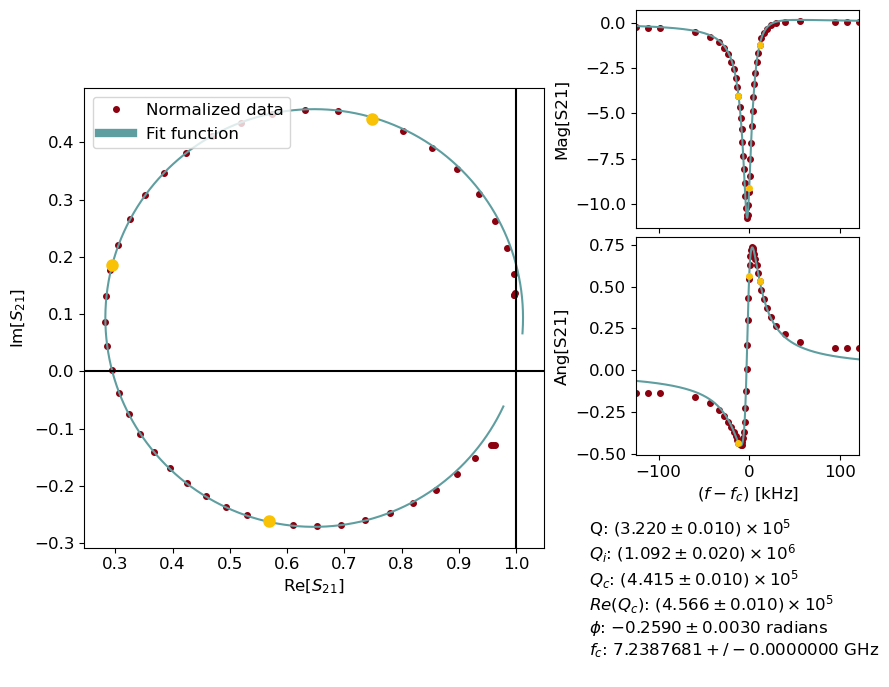

Saved fit results for frequency 7238.768000 MHz, power -3 dBm to CSV
Averaging factor: 0.006
Pin -79.0, N photons: 6.51e+06, navg: 0
Next time: 0.00 min, q_adj: 0.998
Time elapsed: 0.54 min, expected time: 0.24 min


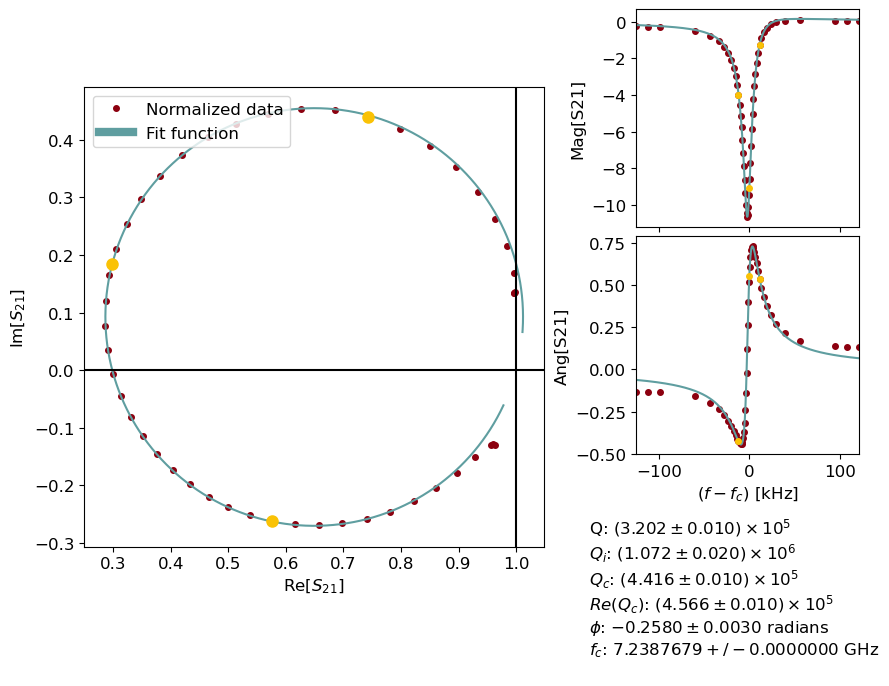

Saved fit results for frequency 7238.768000 MHz, power -6 dBm to CSV
Averaging factor: 0.013
Pin -82.0, N photons: 3.23e+06, navg: 0
Next time: 0.00 min, q_adj: 0.995
Time elapsed: 0.34 min, expected time: 0.15 min


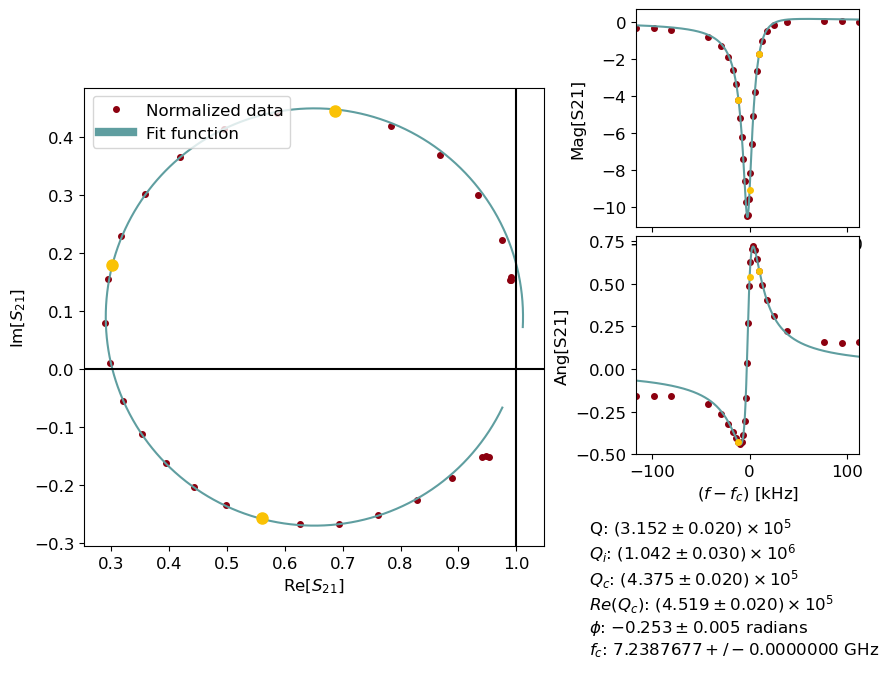

Saved fit results for frequency 7238.768000 MHz, power -9 dBm to CSV
Averaging factor: 0.025
Pin -85.0, N photons: 1.58e+06, navg: 0
Next time: 0.00 min, q_adj: 0.984
Time elapsed: 0.34 min, expected time: 0.15 min


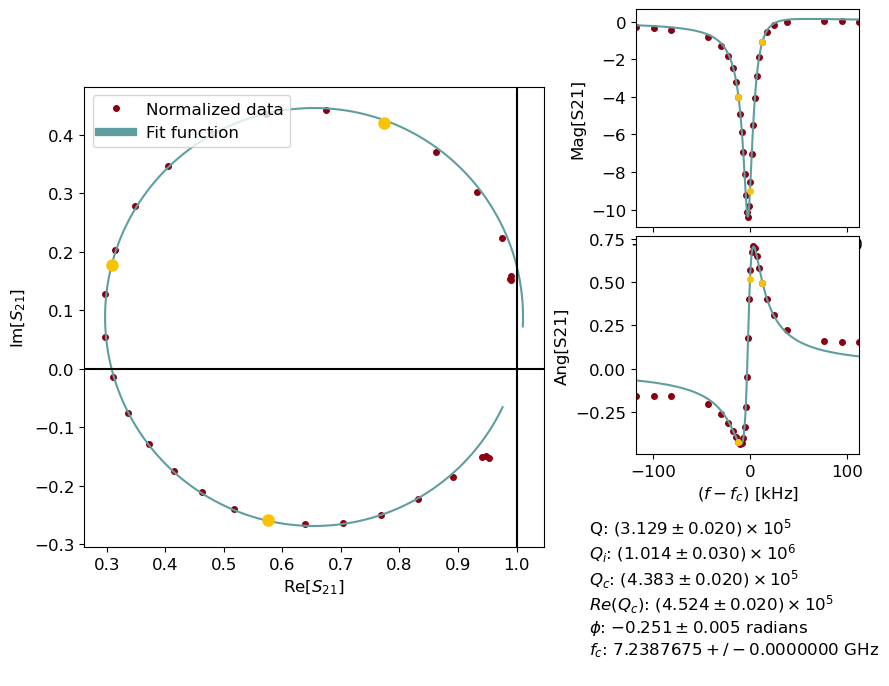

Saved fit results for frequency 7238.768000 MHz, power -12 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 0.052
Pin -88.0, N photons: 7.8e+05, navg: 0
Next time: 0.00 min, q_adj: 0.992
Time elapsed: 0.33 min, expected time: 0.15 min


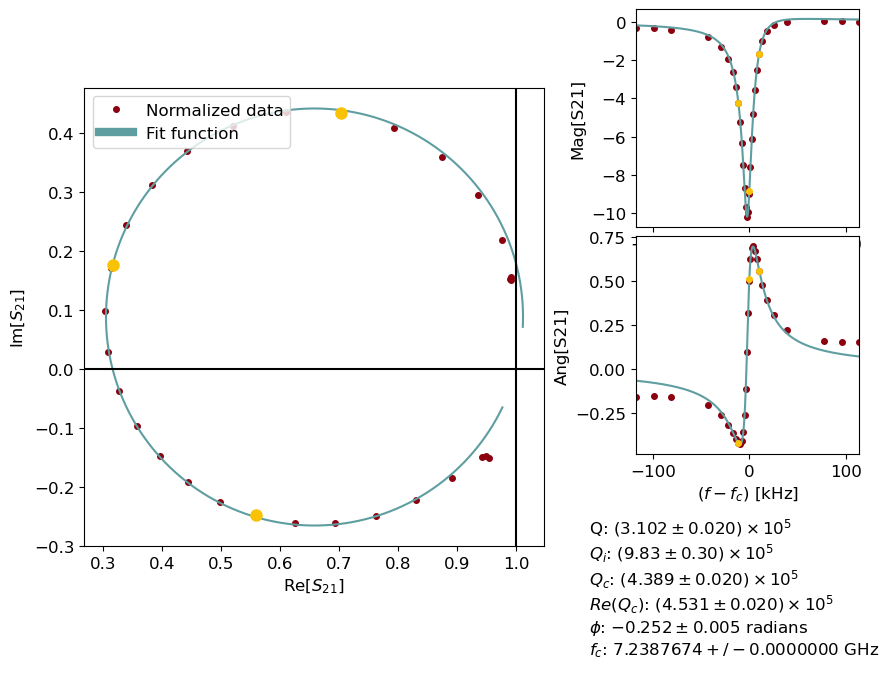

Saved fit results for frequency 7238.768000 MHz, power -15 dBm to CSV
Fit parameters: [7203444.9161 1113615.0086  656584.6838       1.7569]
Averaging factor: 0.105
Pin -91.0, N photons: 3.84e+05, navg: 0
Next time: 0.00 min, q_adj: 0.991
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: 0.0030157146612062075


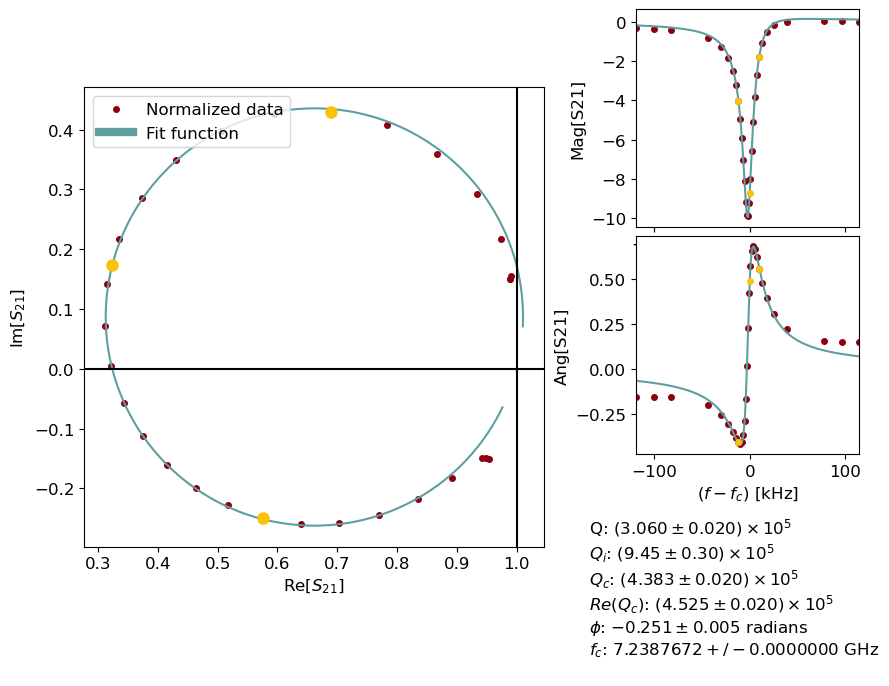

Saved fit results for frequency 7238.767000 MHz, power -18 dBm to CSV
Fit parameters: [4853521.6488 1119176.4316  269964.5045       1.3332]
Averaging factor: 0.216
Pin -94.0, N photons: 1.87e+05, navg: 0
Next time: 0.00 min, q_adj: 0.987
Time elapsed: 0.33 min, expected time: 0.15 min
Qi err: 0.003197849425278752


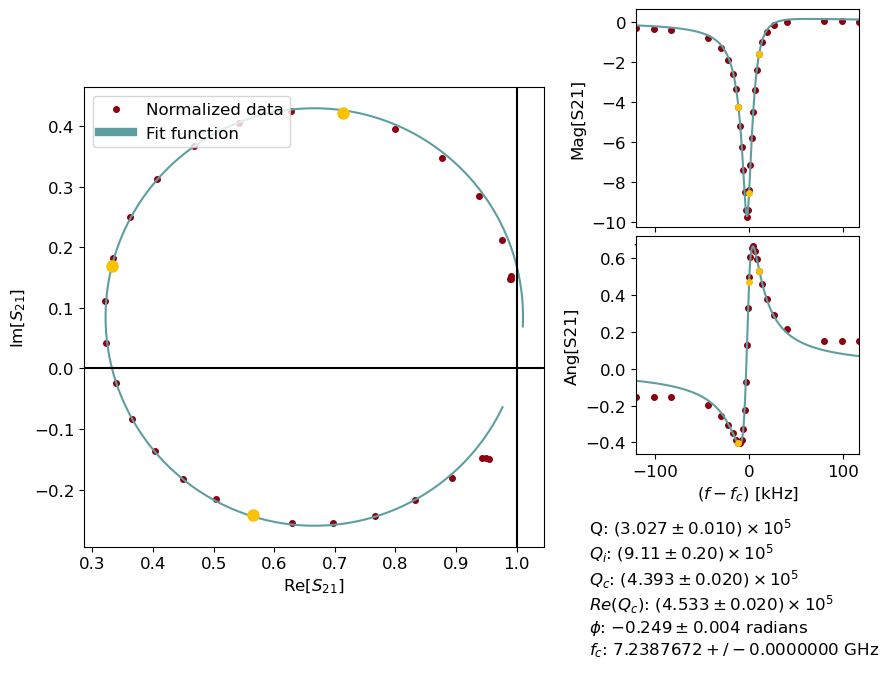

Saved fit results for frequency 7238.767000 MHz, power -21 dBm to CSV
Fit parameters: [3908544.9442 1123203.4357  152678.516        1.1635]
Averaging factor: 0.443
Pin -97.0, N photons: 9.16e+04, navg: 0
Next time: 0.00 min, q_adj: 0.989
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.0032387371466074655


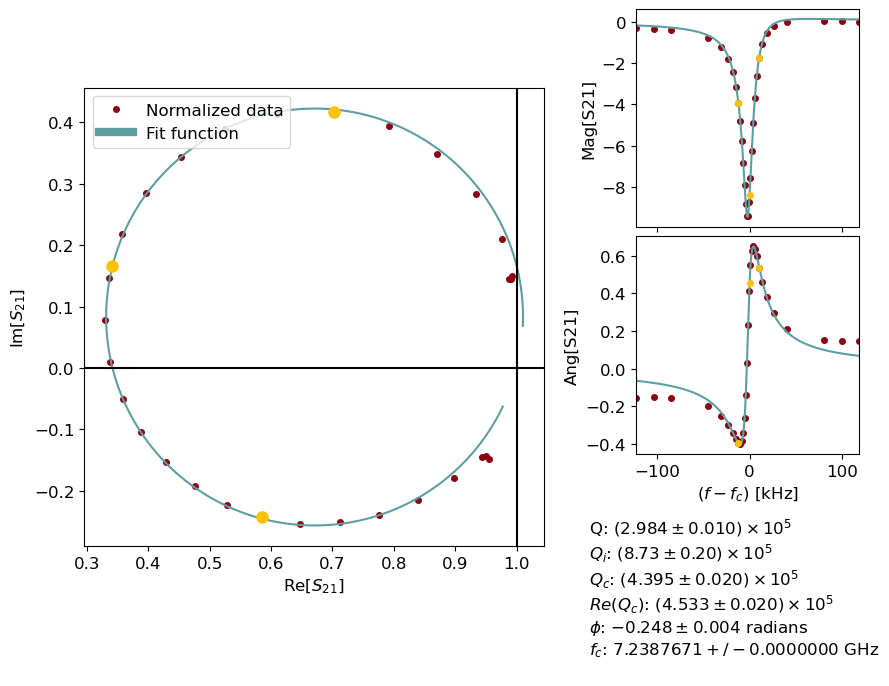

Saved fit results for frequency 7238.767000 MHz, power -24 dBm to CSV
Fit parameters: [3093403.2365 1129195.7181   75456.9818       1.0014]
Averaging factor: 0.910
Pin -100.0, N photons: 4.46e+04, navg: 0
Next time: 0.00 min, q_adj: 0.986
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.0032947275863571524


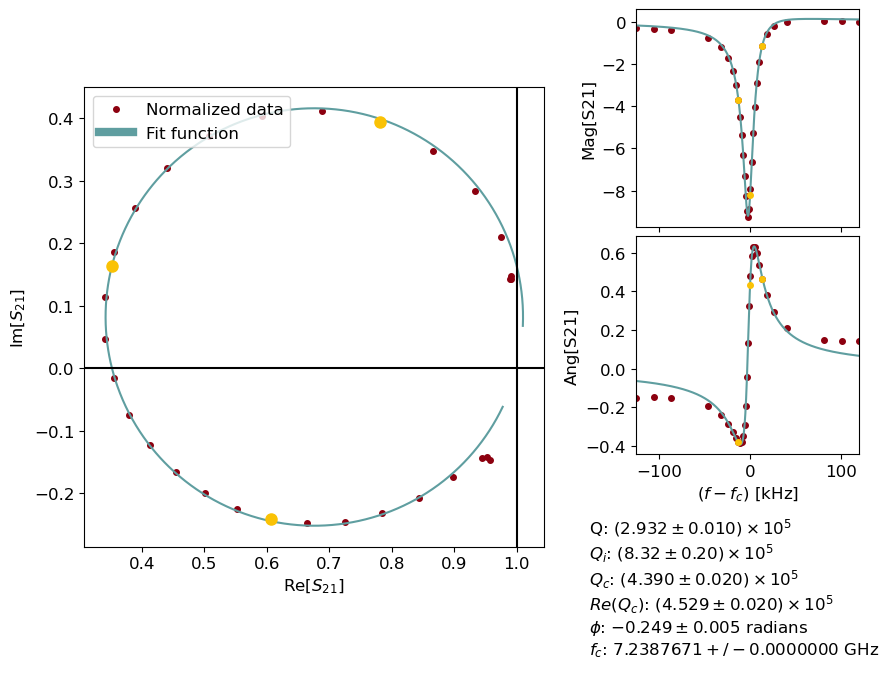

Saved fit results for frequency 7238.767000 MHz, power -27 dBm to CSV
Fit parameters: [2407078.3888 1137129.9908   31963.2507       0.8615]
Averaging factor: 1.874
Pin -103.0, N photons: 2.16e+04, navg: 0
Next time: 0.00 min, q_adj: 0.983
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.003139711389582923


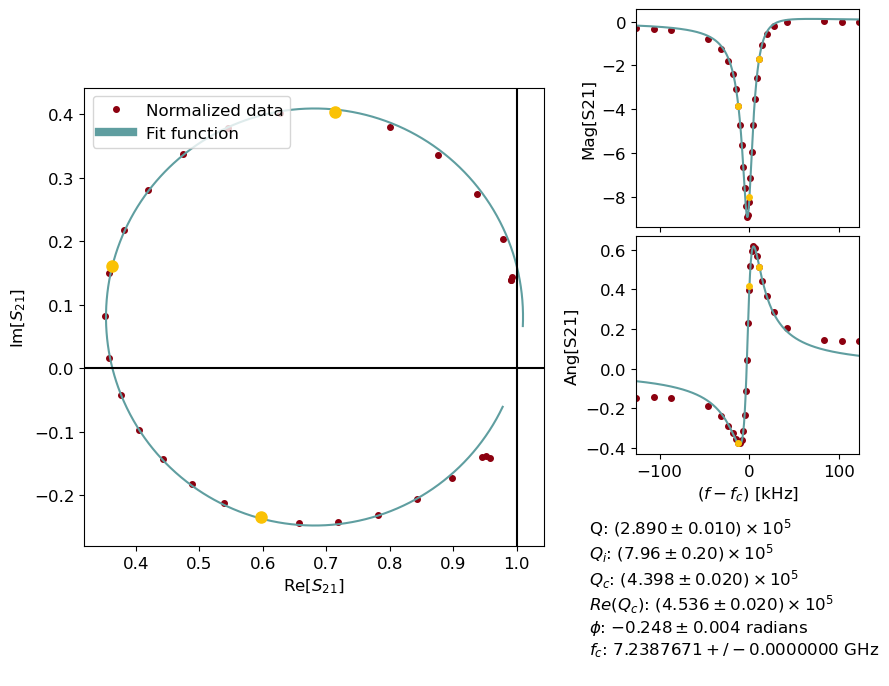

Saved fit results for frequency 7238.767000 MHz, power -30 dBm to CSV
Fit parameters: [2061079.7513 1142980.1919   17738.6941       0.7886]
Averaging factor: 3.867
Pin -106.0, N photons: 1.05e+04, navg: 0
Next time: 0.00 min, q_adj: 0.985
Time elapsed: 0.33 min, expected time: 0.15 min
Qi err: 0.0035212312790795243


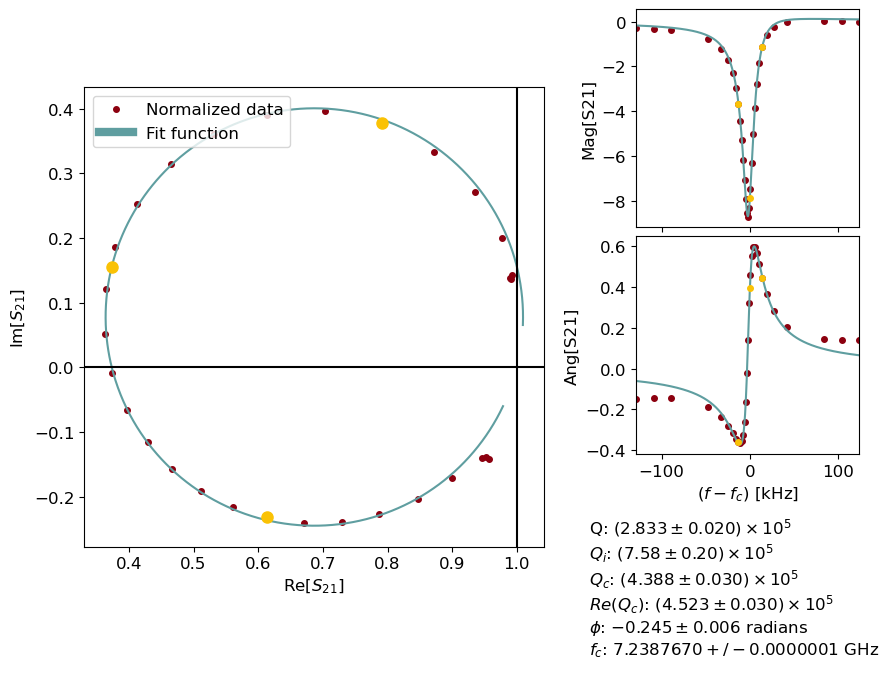

Saved fit results for frequency 7238.767000 MHz, power -33 dBm to CSV
Fit parameters: [1762539.3625 1150189.5598    9271.9218       0.7206]
Averaging factor: 7.990
Pin -109.0, N photons: 5.07e+03, navg: 0
Next time: 0.00 min, q_adj: 0.980
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.0031145847039265677


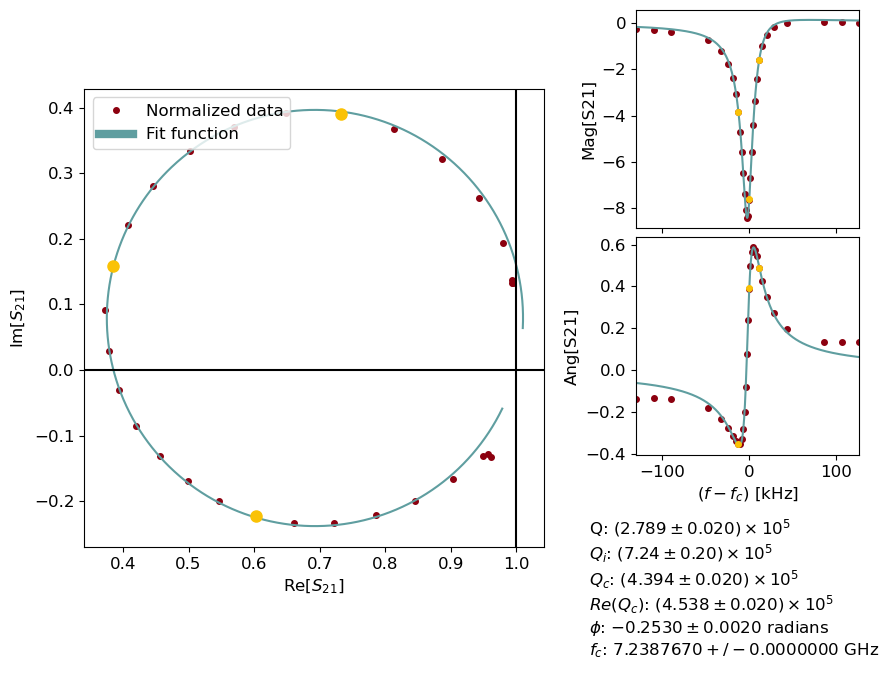

Saved fit results for frequency 7238.767000 MHz, power -36 dBm to CSV
Fit parameters: [1553937.4009 1157117.5701    5264.044        0.6697]
Averaging factor: 16.485
Pin -112.0, N photons: 2.46e+03, navg: 1
Next time: 0.01 min, q_adj: 0.985
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: 0.004482834952655892


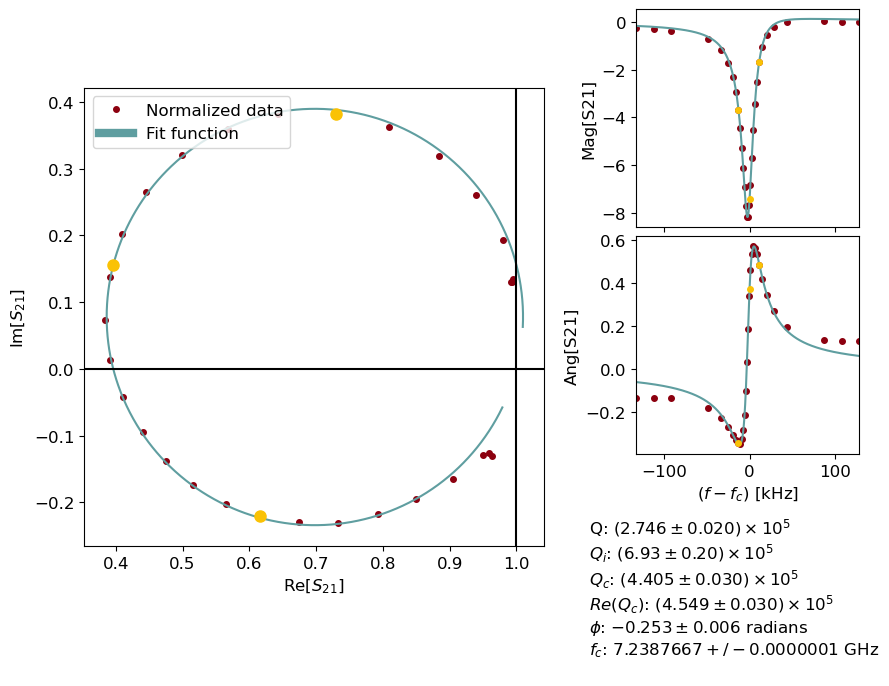

Saved fit results for frequency 7238.767000 MHz, power -39 dBm to CSV
Fit parameters: [1412096.7113 1163417.7051    3318.0866       0.6322]
Averaging factor: 34.144
Pin -115.0, N photons: 1.19e+03, navg: 2
Next time: 0.01 min, q_adj: 0.985
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.004034691159917363


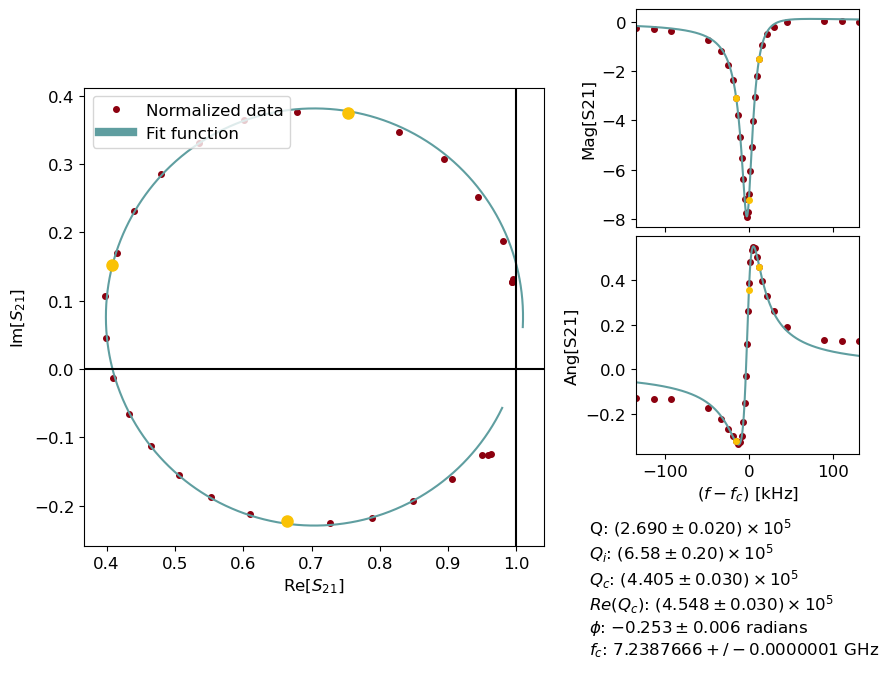

Saved fit results for frequency 7238.767000 MHz, power -42 dBm to CSV
Fit parameters: [1248067.3944 1173004.1241    1752.219        0.5859]
Averaging factor: 70.961
Pin -118.0, N photons: 573, navg: 4
Next time: 0.02 min, q_adj: 0.979
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: 0.005018625136797658


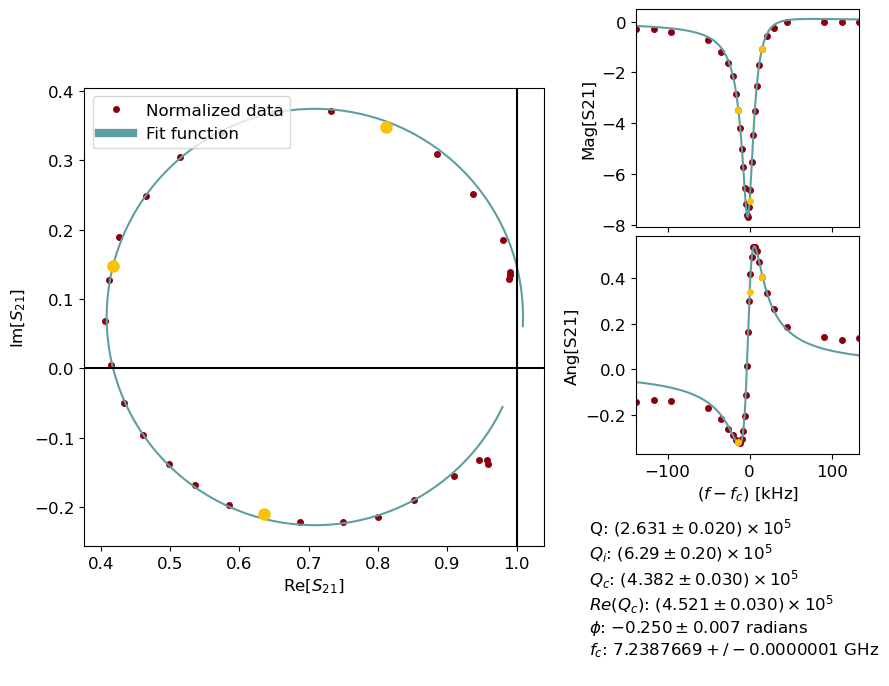

Saved fit results for frequency 7238.767000 MHz, power -45 dBm to CSV
Fit parameters: [1132430.0468 1181659.7828    1023.7585       0.5518]
Averaging factor: 147.306
Pin -121.0, N photons: 277, navg: 8
Next time: 0.04 min, q_adj: 0.978
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: 0.0071404832935895455


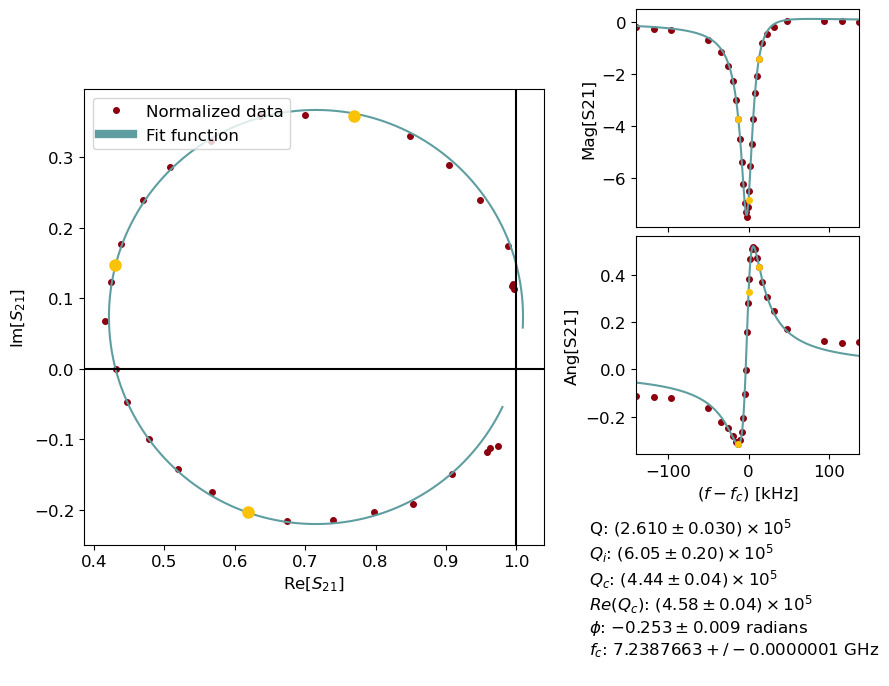

Saved fit results for frequency 7238.766000 MHz, power -48 dBm to CSV
Fit parameters: [1057702.7887 1188650.1429     686.9339       0.5285]
Averaging factor: 303.821
Pin -124.0, N photons: 135, navg: 15
Next time: 0.07 min, q_adj: 0.992
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.01125504260404003


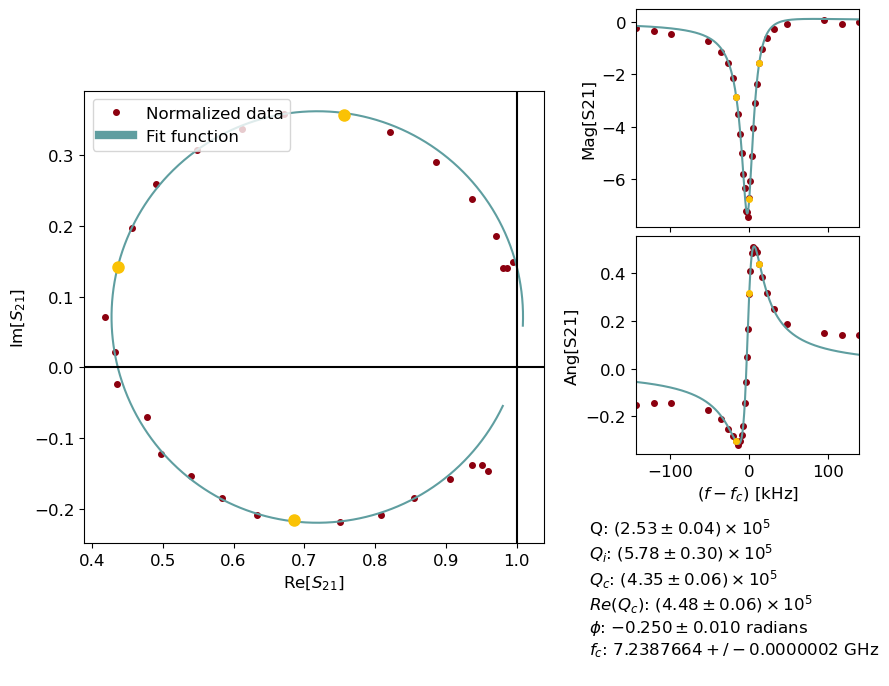

Saved fit results for frequency 7238.766000 MHz, power -51 dBm to CSV
Fit parameters: [ 978374.1415 1197843.8285     424.84         0.5021]
Averaging factor: 625.488
Pin -127.0, N photons: 64.5, navg: 33
Next time: 0.17 min, q_adj: 0.968
Time elapsed: 0.35 min, expected time: 0.17 min
Qi err: 0.010405898397800373


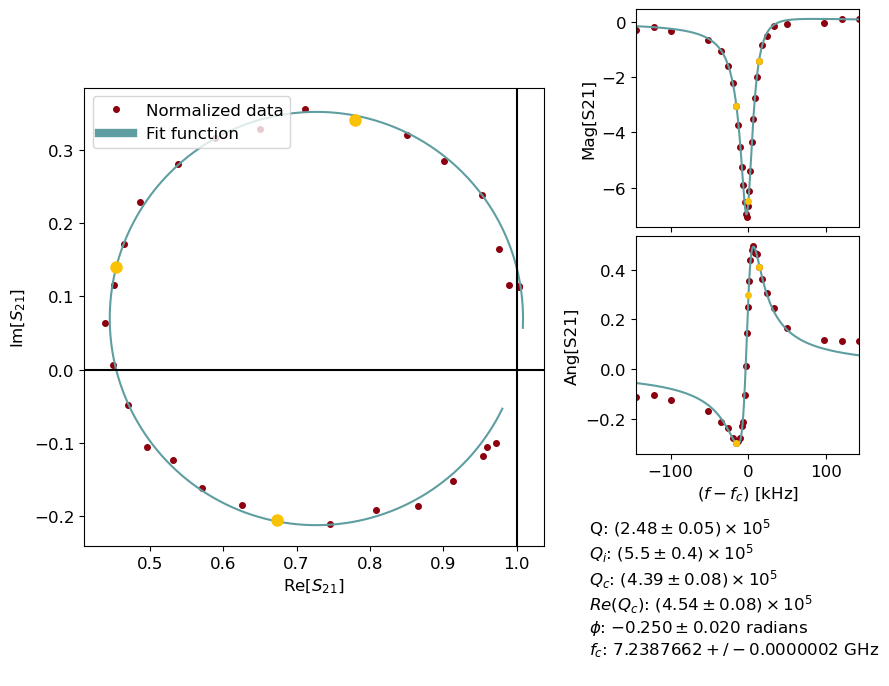

Saved fit results for frequency 7238.766000 MHz, power -54 dBm to CSV
Fit parameters: [ 872221.0734 1213077.0052     200.231        0.4658]
Averaging factor: 1314.826
Pin -130.0, N photons: 30.7, navg: 68
Next time: 0.34 min, q_adj: 0.980


Time elapsed: 0.53 min, expected time: 0.34 min
Qi err: 0.011046020277186574


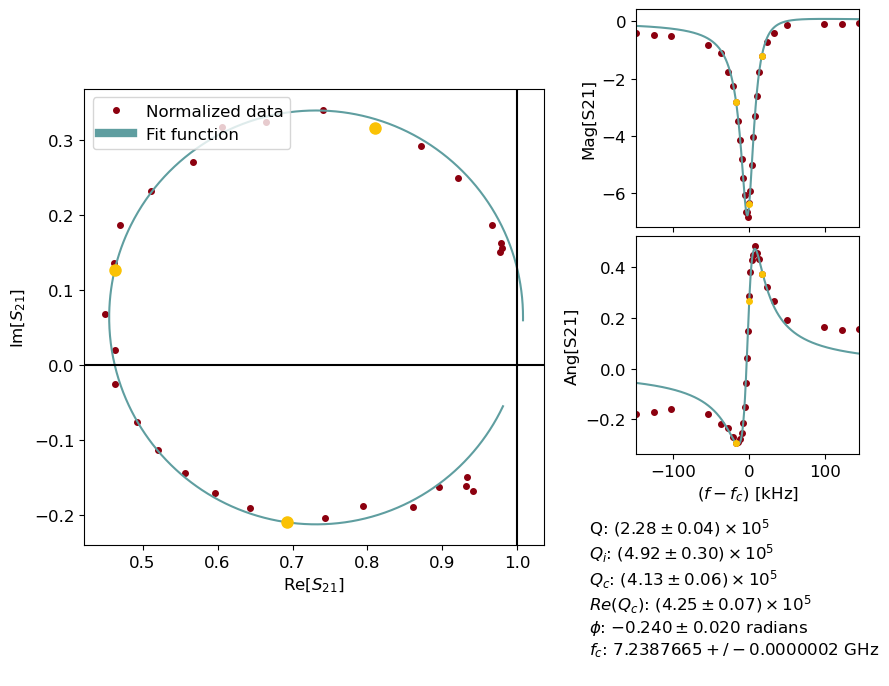

Saved fit results for frequency 7238.767000 MHz, power -57 dBm to CSV
Fit parameters: [ 676368.0289 1248367.7758      32.6833       0.4033]
Averaging factor: 2830.088
Pin -133.0, N photons: 13.9, navg: 167
Next time: 0.84 min, q_adj: 0.921
Time elapsed: 0.98 min, expected time: 0.84 min
Qi err: 0.010167298850501766


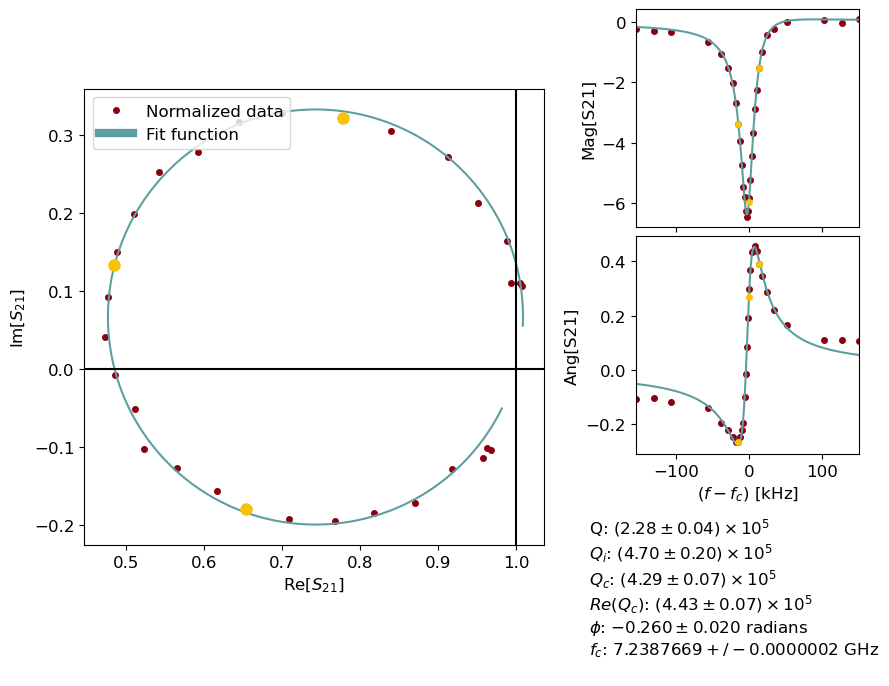

Saved fit results for frequency 7238.767000 MHz, power -60 dBm to CSV
Fit parameters: [ 563348.1787 1272202.6391       8.1089       0.3718]
Averaging factor: 5923.676
Pin -136.0, N photons: 6.71, navg: 296
Next time: 1.48 min, q_adj: 1.000


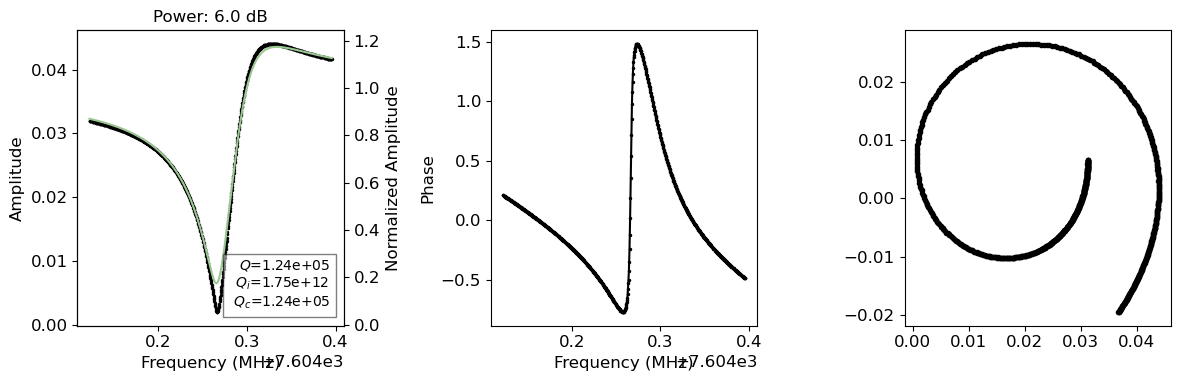

Time elapsed: 0.54 min, expected time: 0.24 min


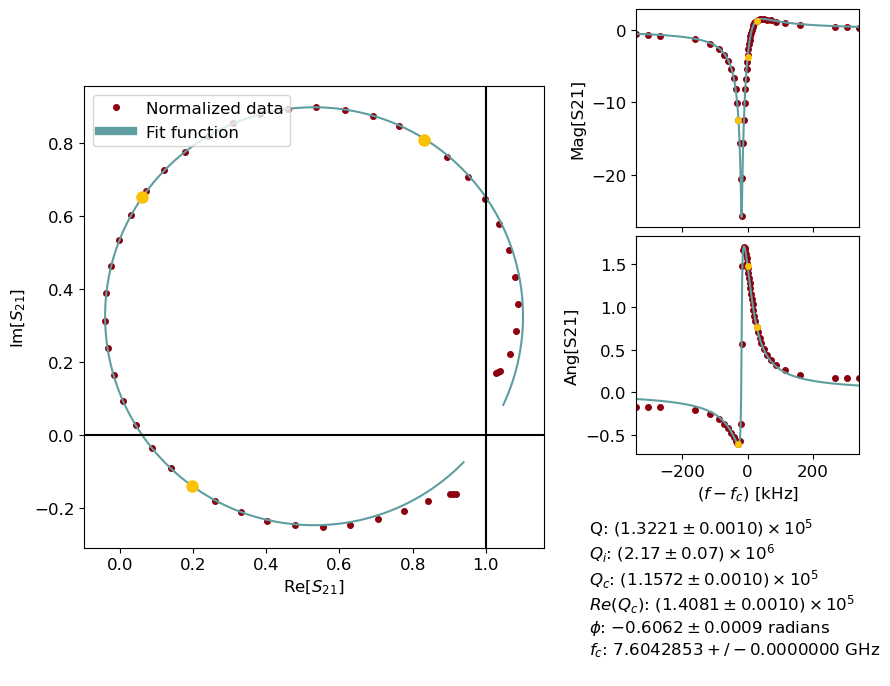

Saved fit results for frequency 7604.284000 MHz, power 6 dBm to CSV
Averaging factor: 0.001
Pin -70.0, N photons: 1.98e+07, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.54 min, expected time: 0.24 min


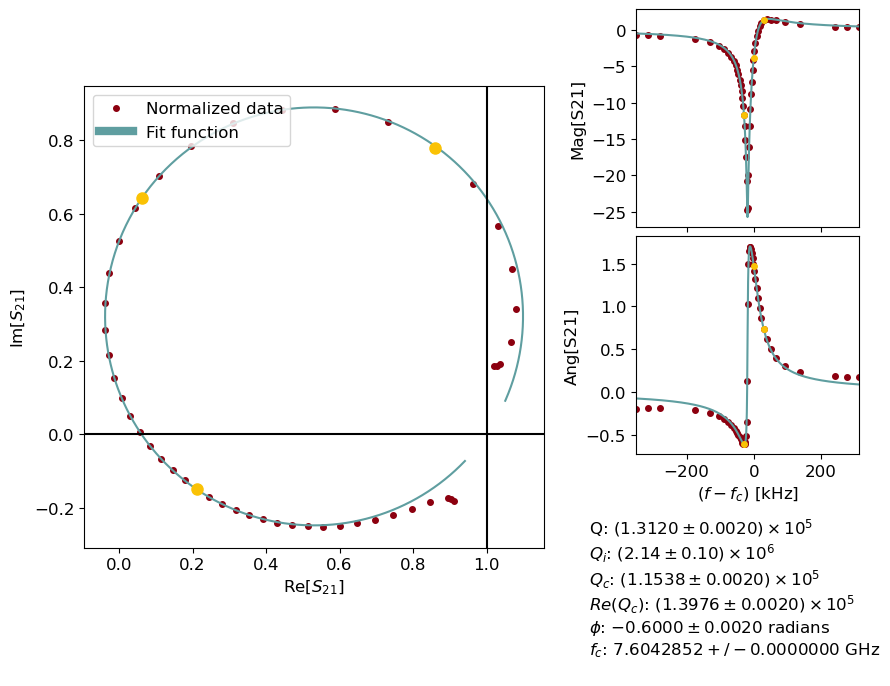

Saved fit results for frequency 7604.283000 MHz, power 3 dBm to CSV
Averaging factor: 0.001
Pin -73.0, N photons: 9.8e+06, navg: 0
Next time: 0.00 min, q_adj: 0.992
Time elapsed: 0.53 min, expected time: 0.24 min


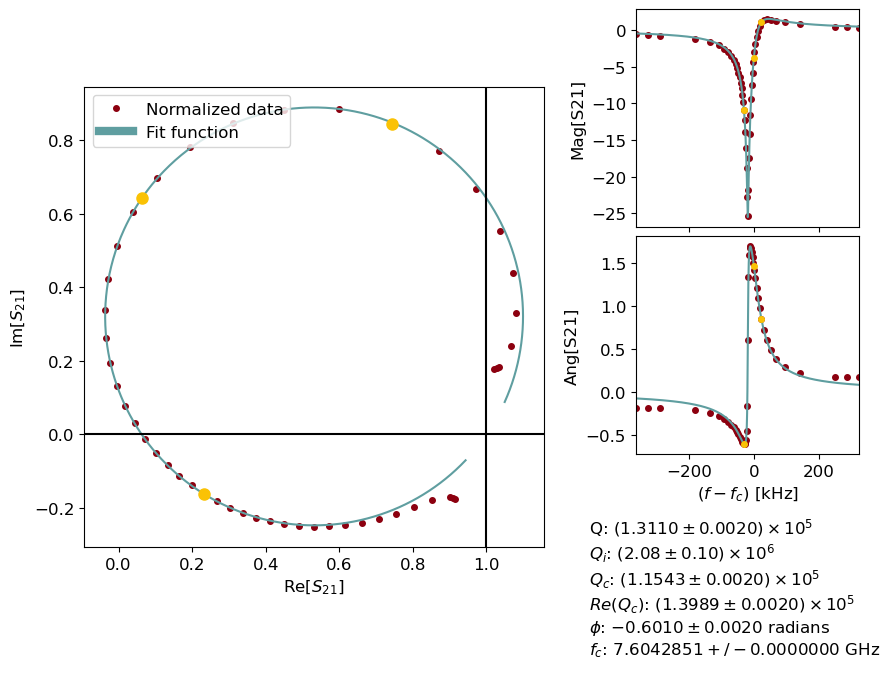

Saved fit results for frequency 7604.283000 MHz, power 0 dBm to CSV
Averaging factor: 0.003
Pin -76.0, N photons: 4.9e+06, navg: 0
Next time: 0.00 min, q_adj: 0.999
Time elapsed: 0.55 min, expected time: 0.24 min


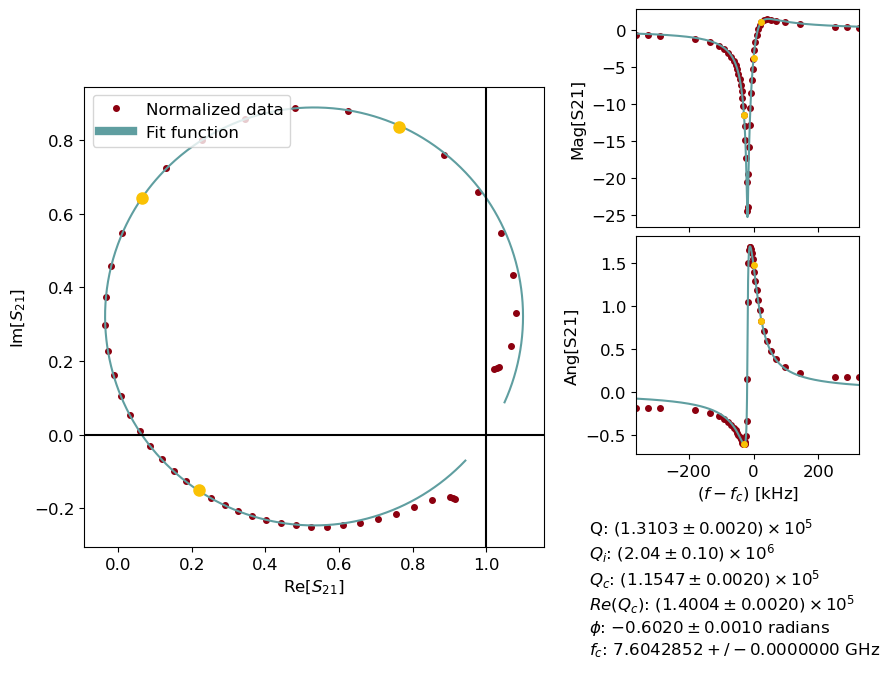

Saved fit results for frequency 7604.283000 MHz, power -3 dBm to CSV
Averaging factor: 0.005
Pin -79.0, N photons: 2.45e+06, navg: 0
Next time: 0.00 min, q_adj: 0.999
Time elapsed: 0.55 min, expected time: 0.24 min


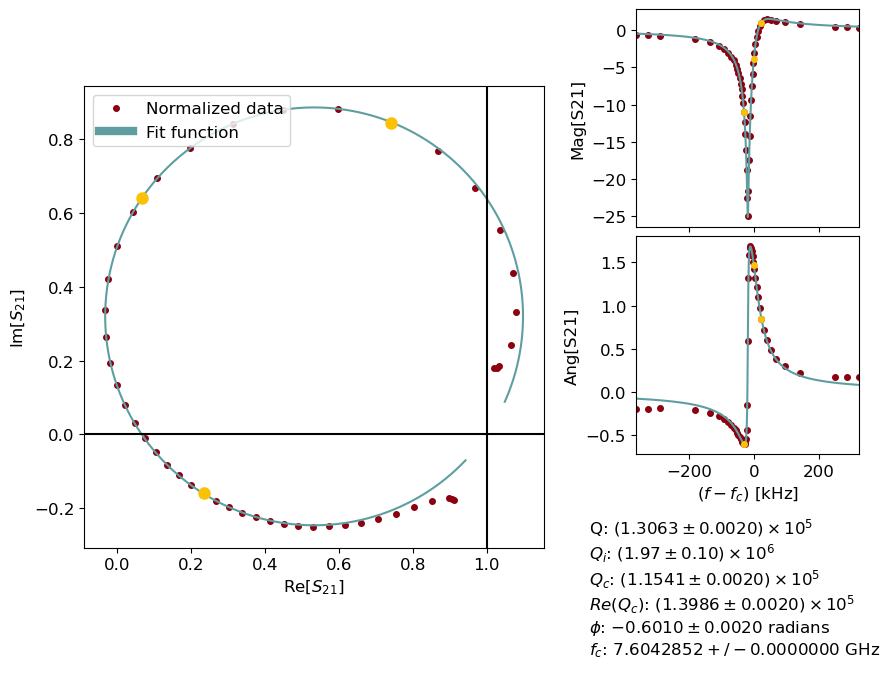

Saved fit results for frequency 7604.283000 MHz, power -6 dBm to CSV
Averaging factor: 0.010
Pin -82.0, N photons: 1.22e+06, navg: 0
Next time: 0.00 min, q_adj: 0.997
Time elapsed: 0.33 min, expected time: 0.15 min


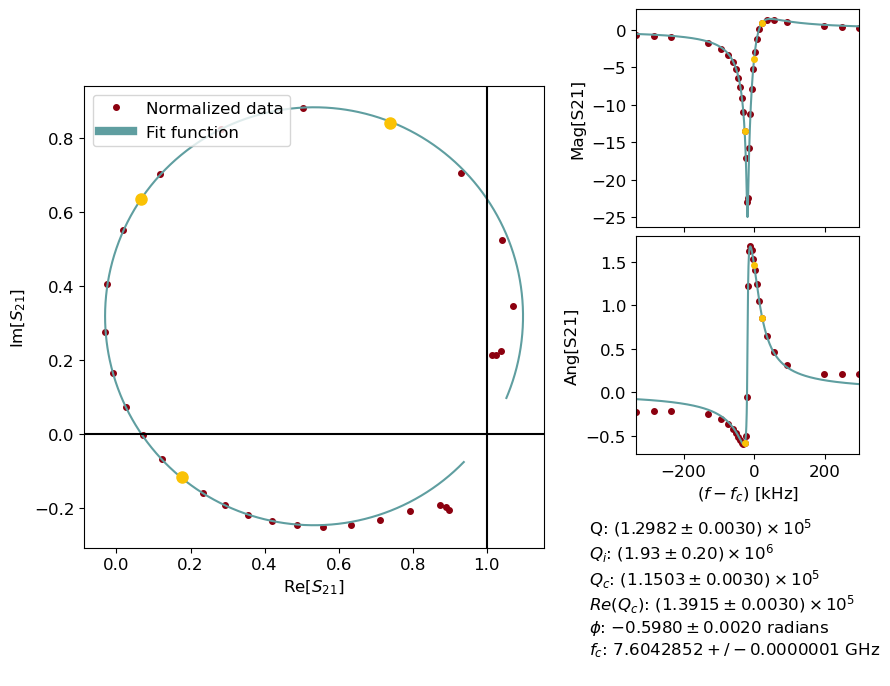

Saved fit results for frequency 7604.283000 MHz, power -9 dBm to CSV
Averaging factor: 0.020
Pin -85.0, N photons: 6.07e+05, navg: 0
Next time: 0.00 min, q_adj: 0.994
Time elapsed: 0.35 min, expected time: 0.15 min


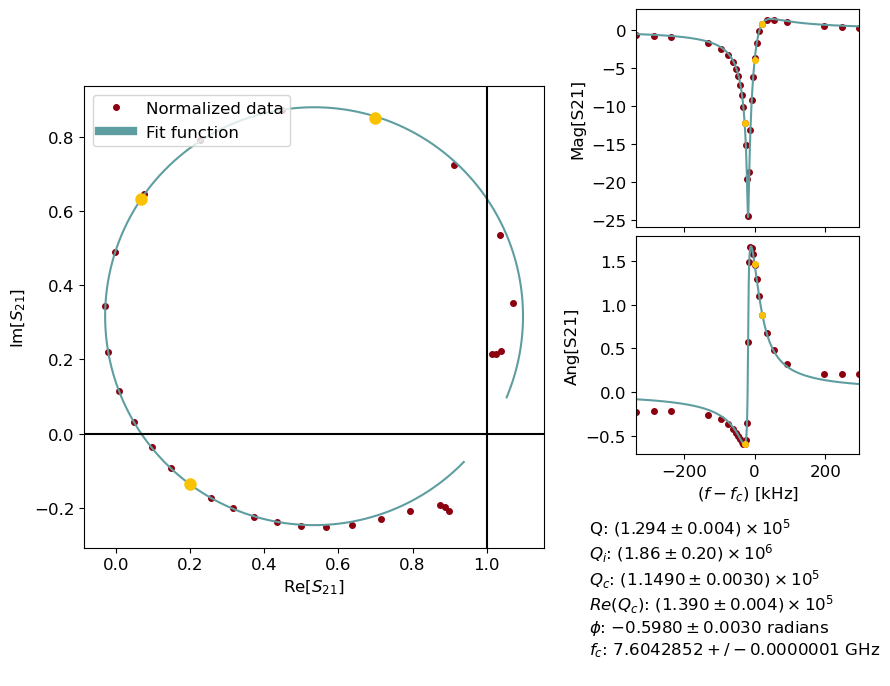

Saved fit results for frequency 7604.283000 MHz, power -12 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 0.040
Pin -88.0, N photons: 3.02e+05, navg: 0
Next time: 0.00 min, q_adj: 0.996
Time elapsed: 0.34 min, expected time: 0.15 min


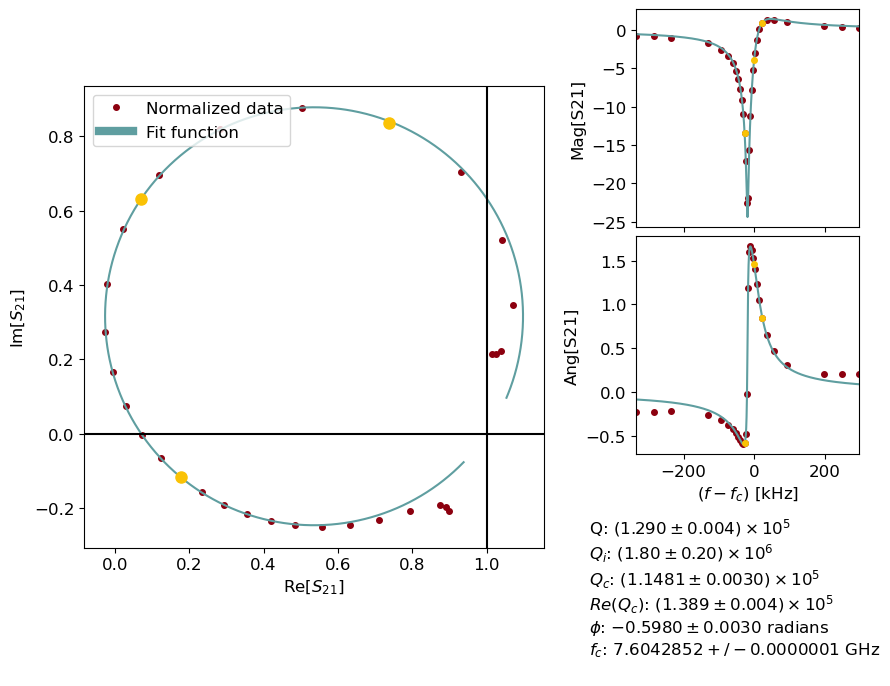

Saved fit results for frequency 7604.283000 MHz, power -15 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 0.080
Pin -91.0, N photons: 1.51e+05, navg: 0
Next time: 0.00 min, q_adj: 0.997
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: -inf


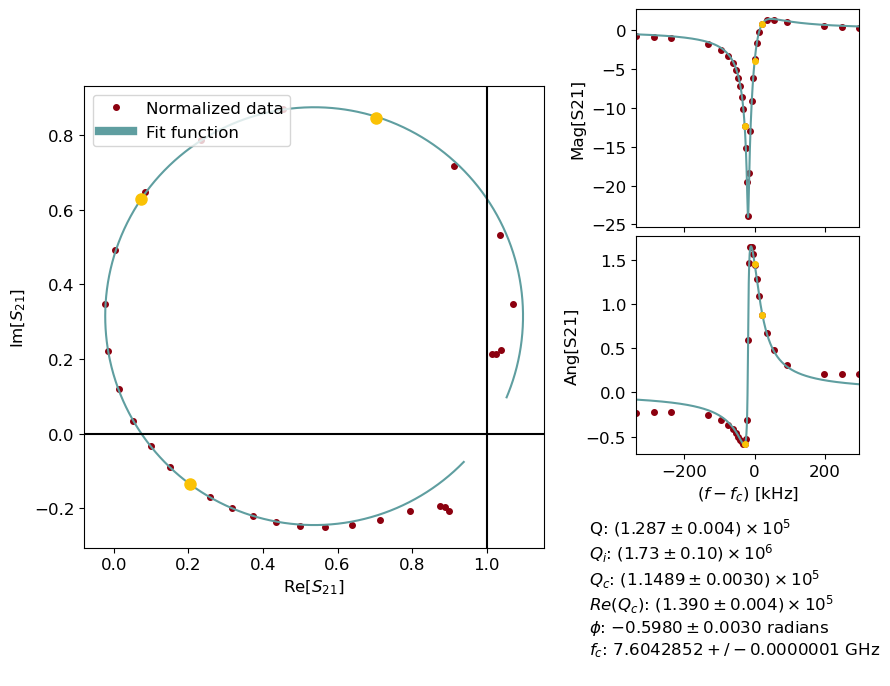

Saved fit results for frequency 7604.283000 MHz, power -18 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 0.159
Pin -94.0, N photons: 7.52e+04, navg: 0
Next time: 0.00 min, q_adj: 0.998
Time elapsed: 0.32 min, expected time: 0.15 min
Qi err: -inf


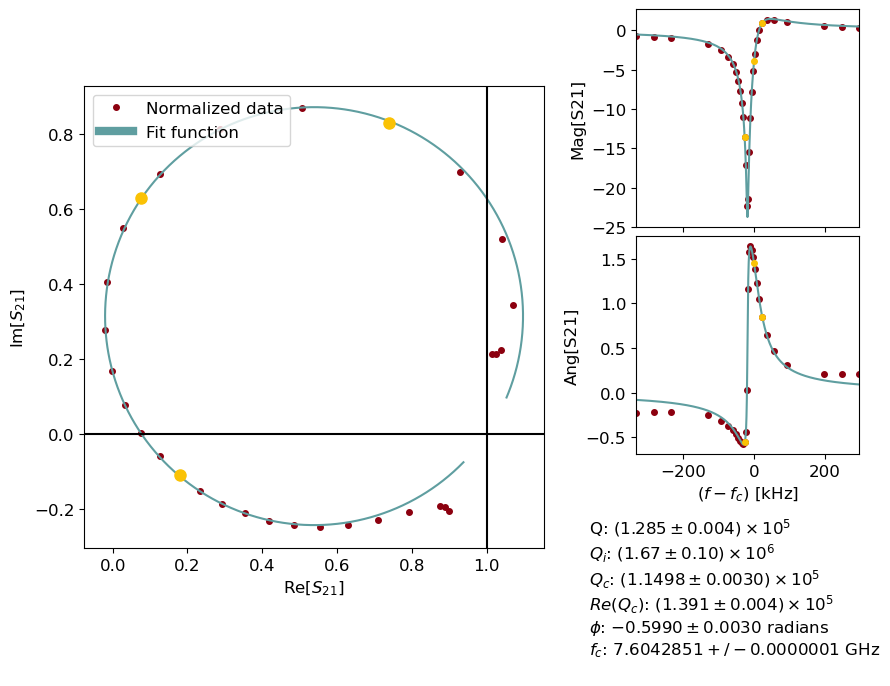

Saved fit results for frequency 7604.278000 MHz, power -21 dBm to CSV
Fit parameters: [1963183.821  2472503.8346     522.8688       0.4175]
Averaging factor: 0.318
Pin -97.0, N photons: 3.75e+04, navg: 0
Next time: 0.00 min, q_adj: 0.998
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: -inf


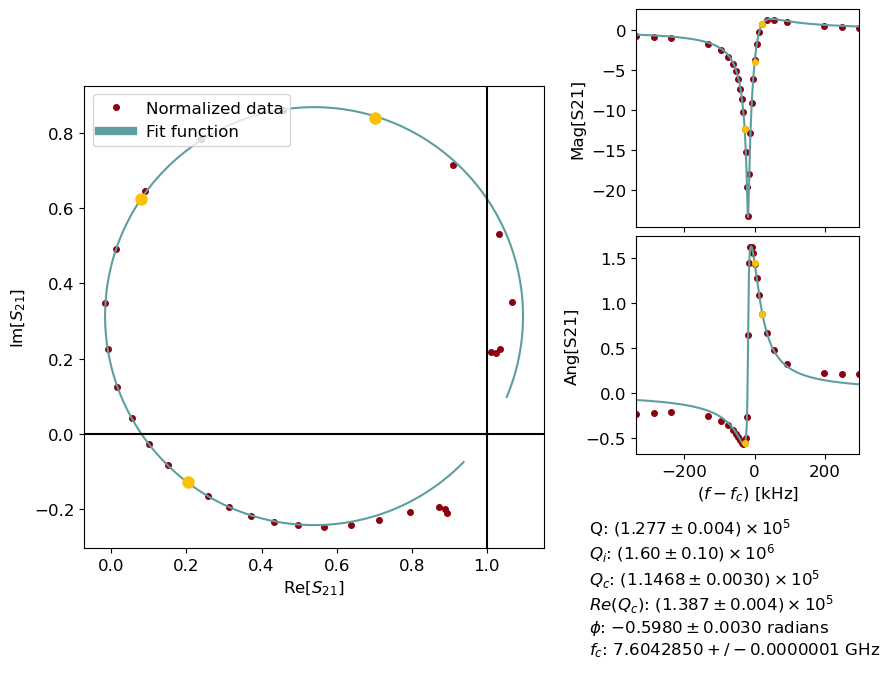

Saved fit results for frequency 7604.281000 MHz, power -24 dBm to CSV
Fit parameters: [1912267.8935 2475429.3087     444.5317       0.4145]
Averaging factor: 0.634
Pin -100.0, N photons: 1.86e+04, navg: 0
Next time: 0.00 min, q_adj: 0.994
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: -inf


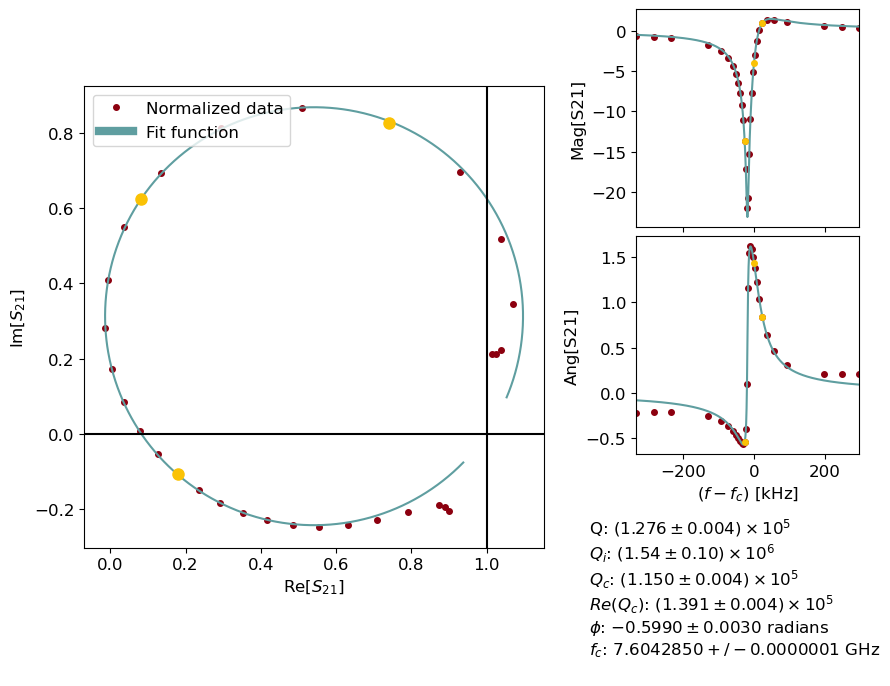

Saved fit results for frequency 7604.279000 MHz, power -27 dBm to CSV
Fit parameters: [2167957.4713 2456975.0248     972.3766       0.4326]
Averaging factor: 1.265
Pin -103.0, N photons: 9.3e+03, navg: 0
Next time: 0.00 min, q_adj: 1.000
Time elapsed: 0.33 min, expected time: 0.15 min
Qi err: -inf


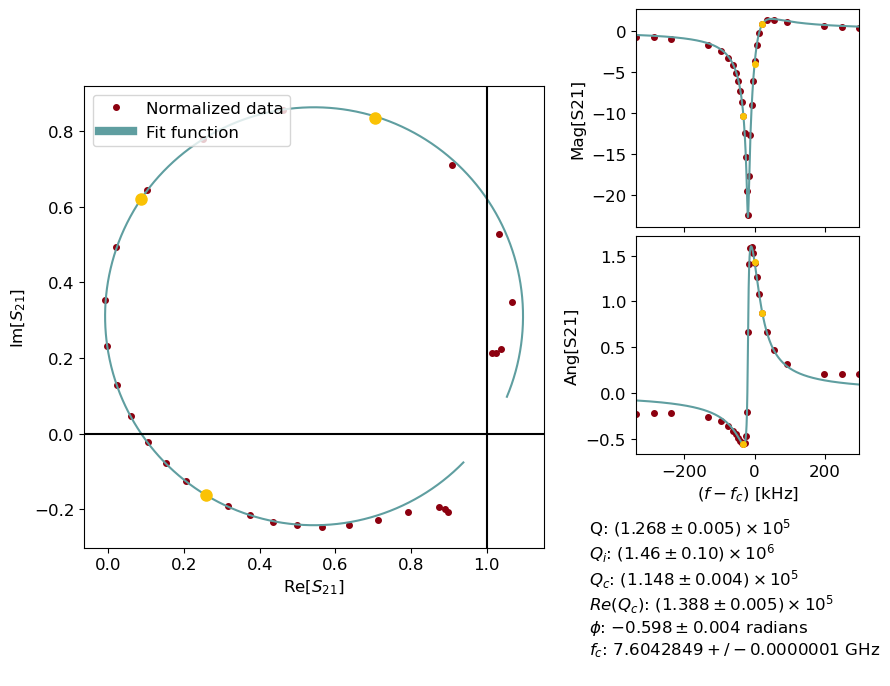

Saved fit results for frequency 7604.282000 MHz, power -30 dBm to CSV
Fit parameters: [1219221.9917 2537553.7578      22.0095       0.3668]
Averaging factor: 2.524
Pin -106.0, N photons: 4.61e+03, navg: 0
Next time: 0.00 min, q_adj: 0.993
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: -inf


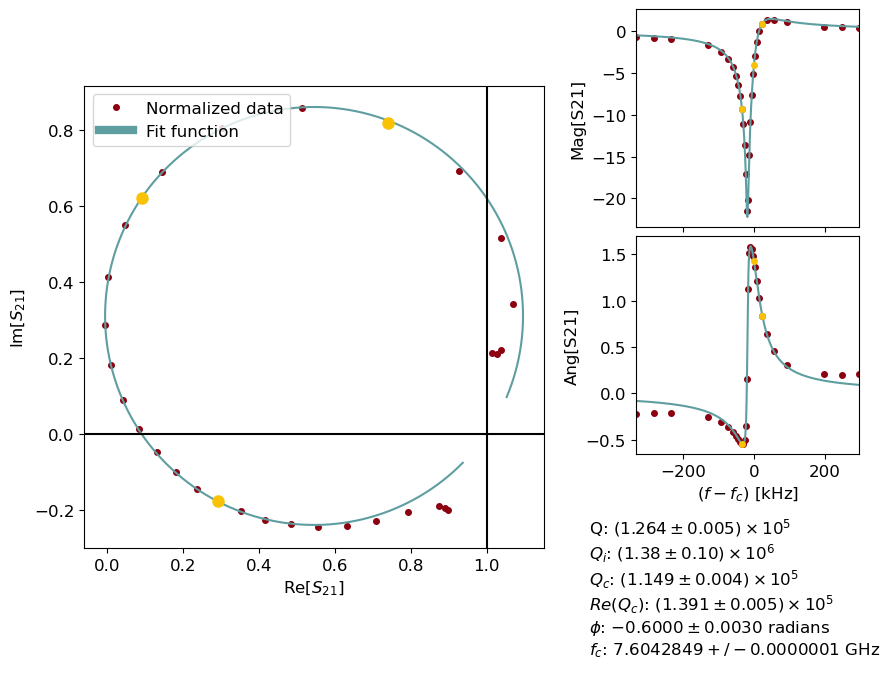

Saved fit results for frequency 7604.280000 MHz, power -33 dBm to CSV
Fit parameters: [ 579705.1842 2583019.4929       0.1553       0.339 ]
Averaging factor: 5.037
Pin -109.0, N photons: 2.3e+03, navg: 0
Next time: 0.00 min, q_adj: 0.997
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: -inf


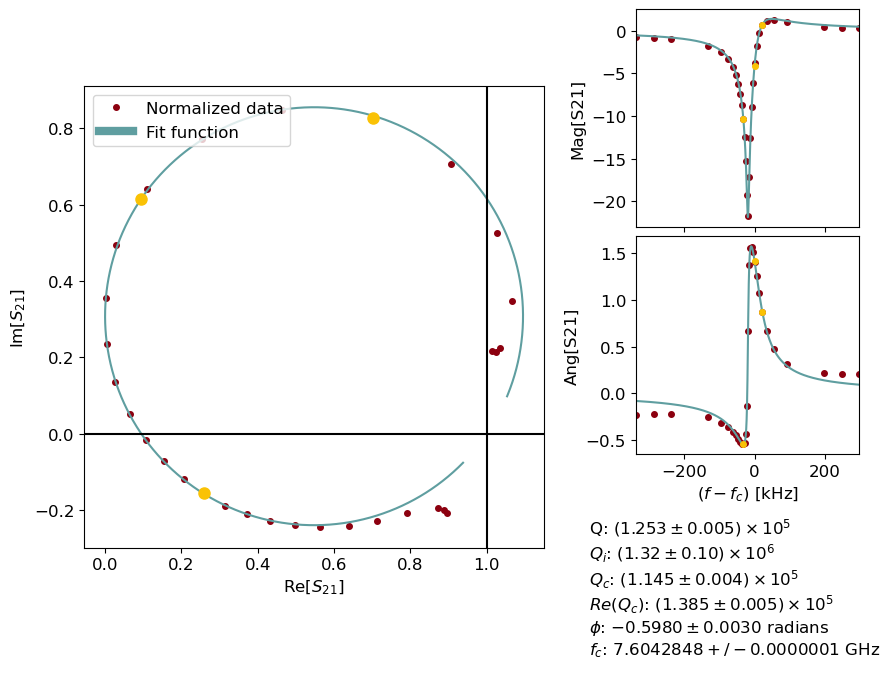

Saved fit results for frequency 7604.282000 MHz, power -36 dBm to CSV
Fit parameters: [ 890314.7246 2560371.303        2.702        0.3517]
Averaging factor: 10.049
Pin -112.0, N photons: 1.13e+03, navg: 1
Next time: 0.01 min, q_adj: 0.991
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: -inf


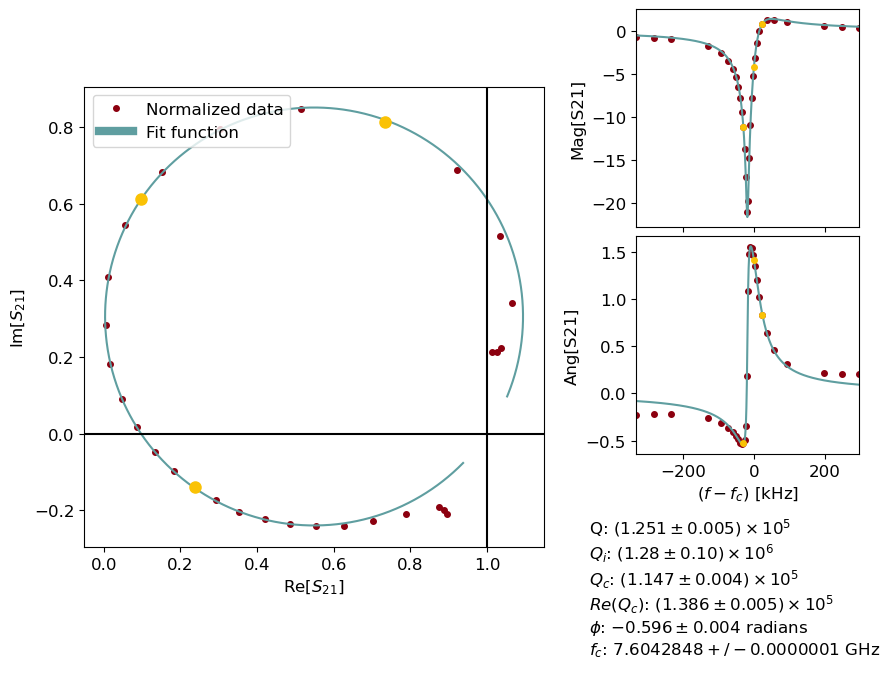

Saved fit results for frequency 7604.280000 MHz, power -39 dBm to CSV
Fit parameters: [1603899.7101 2473708.8568     156.0203       0.4079]
Averaging factor: 20.051
Pin -115.0, N photons: 565, navg: 1
Next time: 0.01 min, q_adj: 0.998
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: -inf


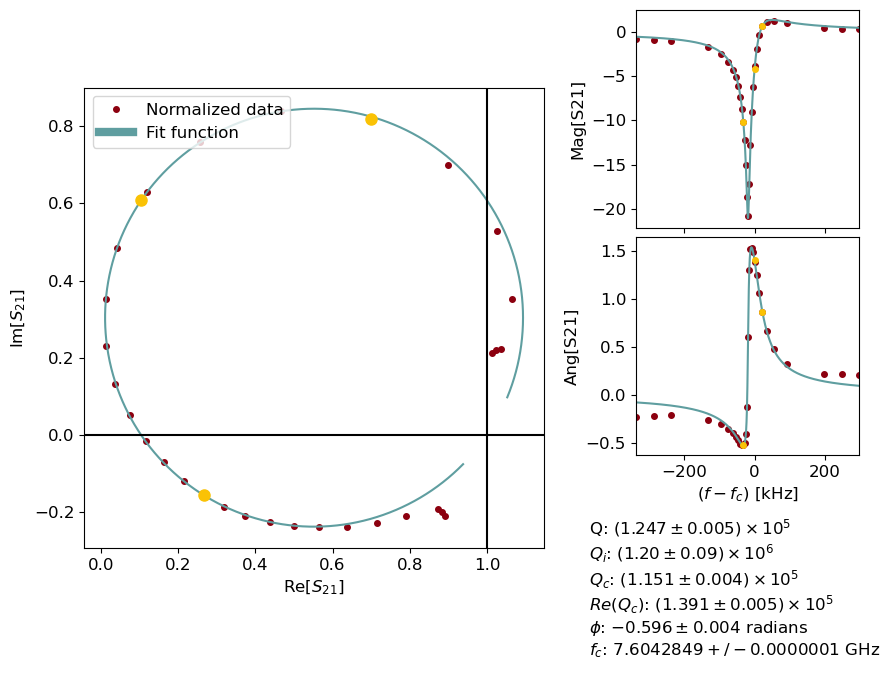

Saved fit results for frequency 7604.282000 MHz, power -42 dBm to CSV
Fit parameters: [1311867.5938 2520569.0168      38.1551       0.3769]
Averaging factor: 40.007
Pin -118.0, N photons: 280, navg: 2
Next time: 0.01 min, q_adj: 0.996
Time elapsed: 0.33 min, expected time: 0.15 min
Qi err: -inf


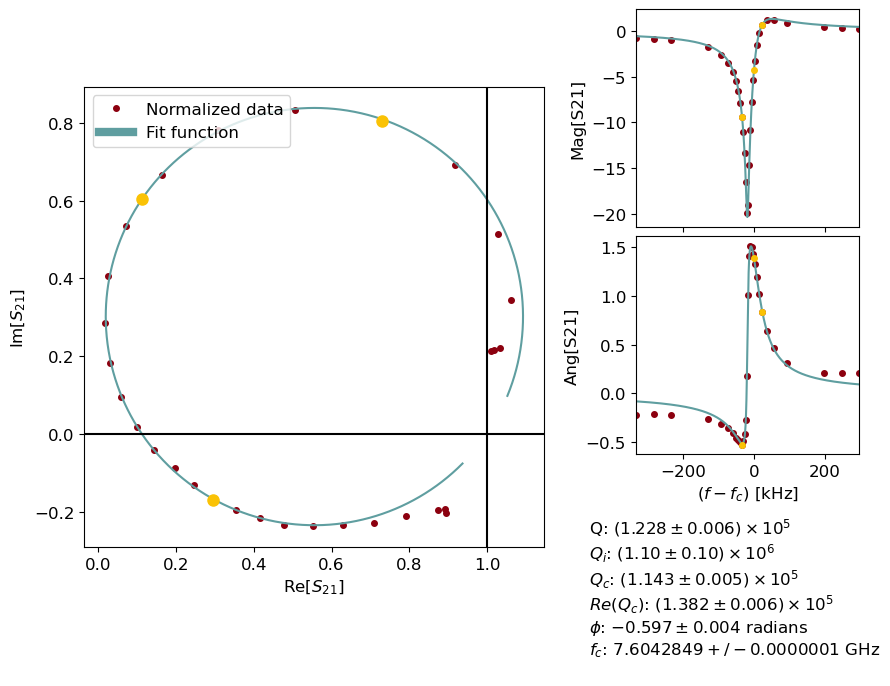

Saved fit results for frequency 7604.279000 MHz, power -45 dBm to CSV
Fit parameters: [ 306829.0424 2666901.1981       0.001        0.3087]
Averaging factor: 79.825
Pin -121.0, N photons: 137, navg: 4
Next time: 0.02 min, q_adj: 0.985
Time elapsed: 0.33 min, expected time: 0.15 min
Qi err: -inf


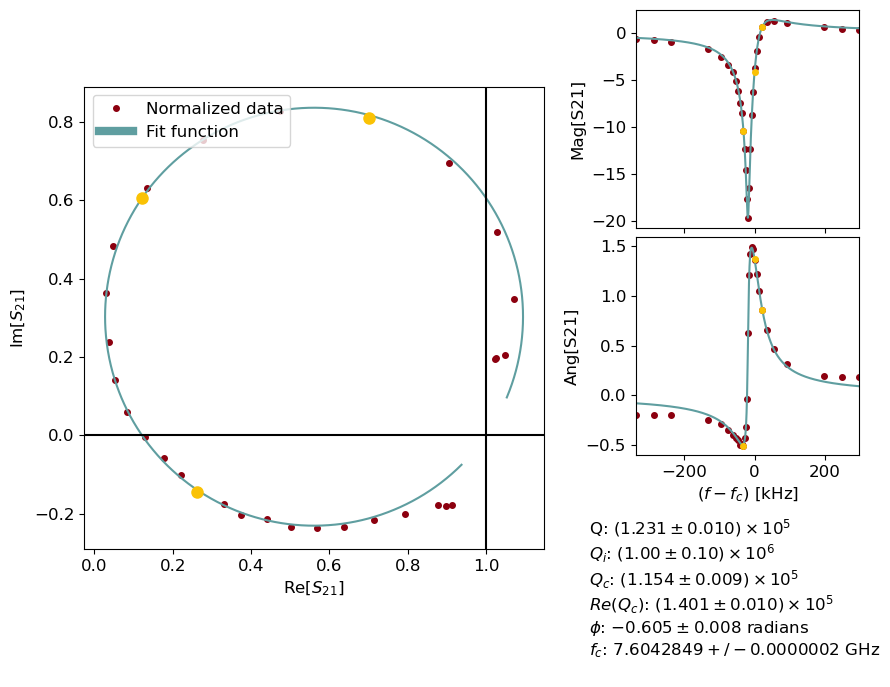

Saved fit results for frequency 7604.282000 MHz, power -48 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 159.273
Pin -124.0, N photons: 68.5, navg: 8
Next time: 0.04 min, q_adj: 1.003
Time elapsed: 0.34 min, expected time: 0.15 min
Qi err: -inf


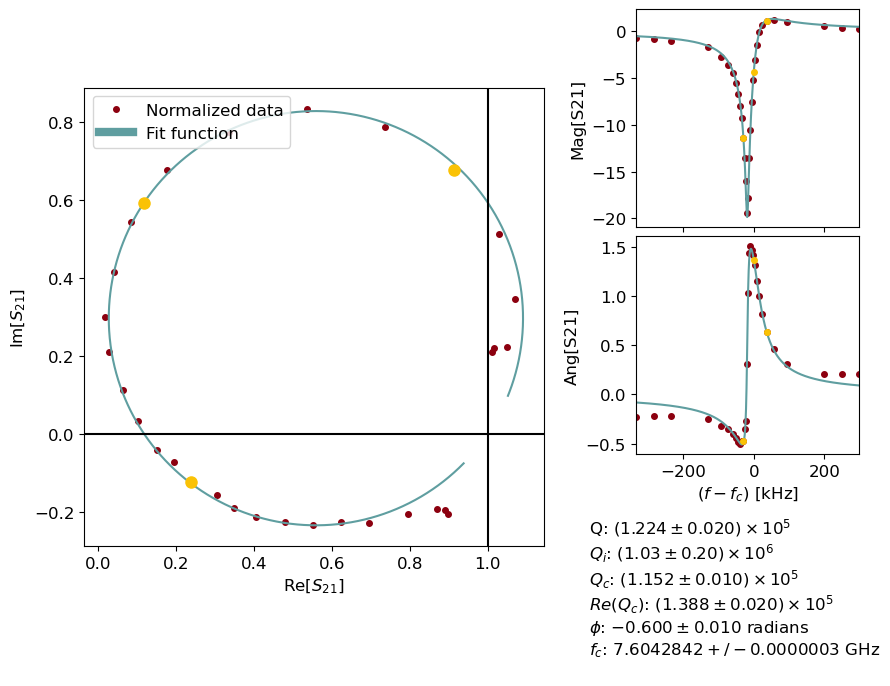

Saved fit results for frequency 7604.279000 MHz, power -51 dBm to CSV
Fit parameters: [ 800307.3564 2575684.4471       1.1877       0.3432]
Averaging factor: 317.789
Pin -127.0, N photons: 34, navg: 16
Next time: 0.08 min, q_adj: 0.994
Time elapsed: 0.32 min, expected time: 0.15 min
Qi err: -inf


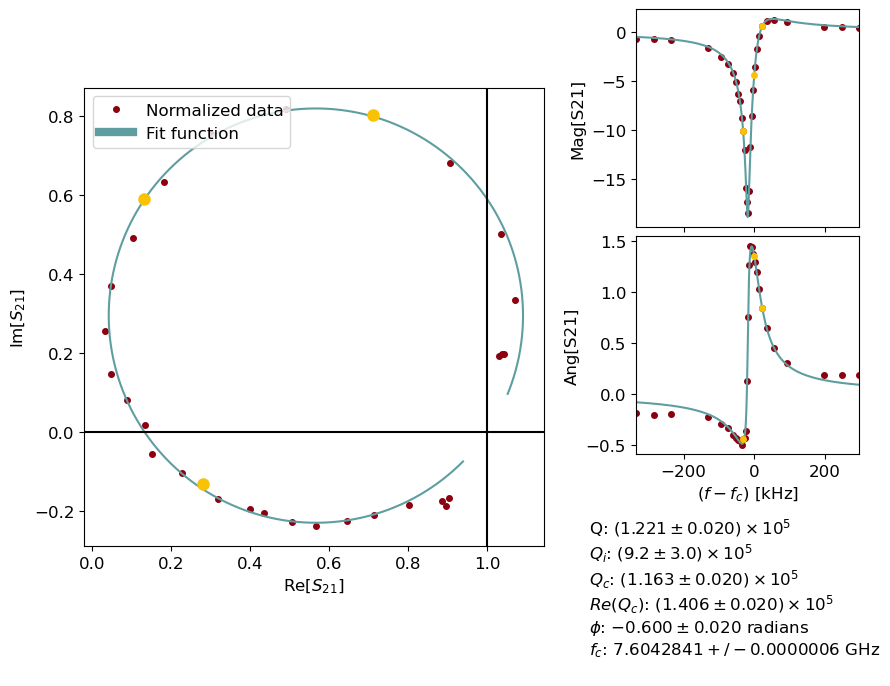

Saved fit results for frequency 7604.282000 MHz, power -54 dBm to CSV
Fit parameters: [ 665770.3026 2604754.3552       0.297        0.3312]
Averaging factor: 634.075
Pin -130.0, N photons: 16.8, navg: 32
Next time: 0.16 min, q_adj: 0.998
Time elapsed: 0.36 min, expected time: 0.16 min
Qi err: -inf


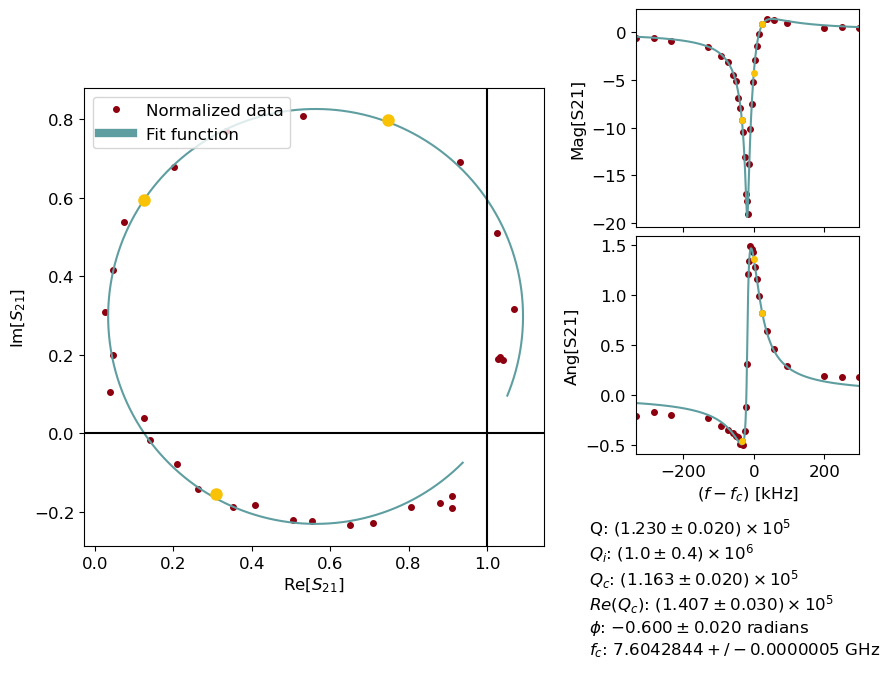

Saved fit results for frequency 7604.283000 MHz, power -57 dBm to CSV
Fit parameters: [1098544.3586 2489693.4883      13.5261       0.3835]
Averaging factor: 1265.149
Pin -133.0, N photons: 8.55, navg: 62
Next time: 0.31 min, q_adj: 1.007
Time elapsed: 0.50 min, expected time: 0.31 min
Qi err: -inf


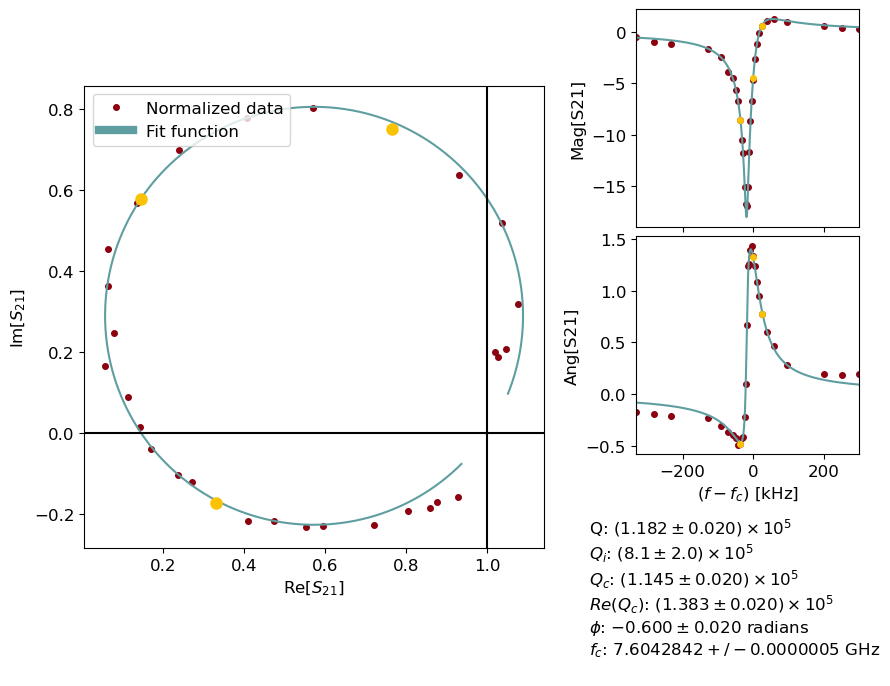

Saved fit results for frequency 7604.280000 MHz, power -60 dBm to CSV
Fit parameters: [ 810312.1772 2586023.2484       1.236        0.3403]
Averaging factor: 2524.295
Pin -136.0, N photons: 4.02, navg: 137
Next time: 0.69 min, q_adj: 0.961


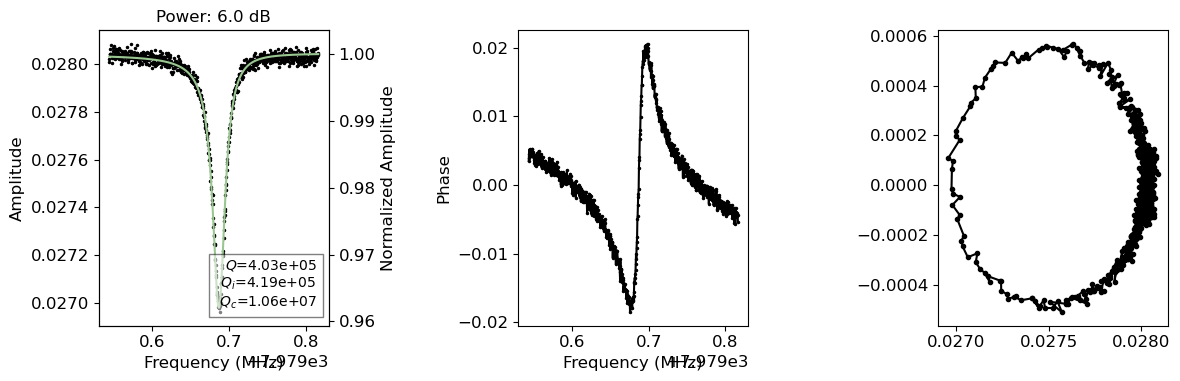

Time elapsed: 0.54 min, expected time: 0.24 min


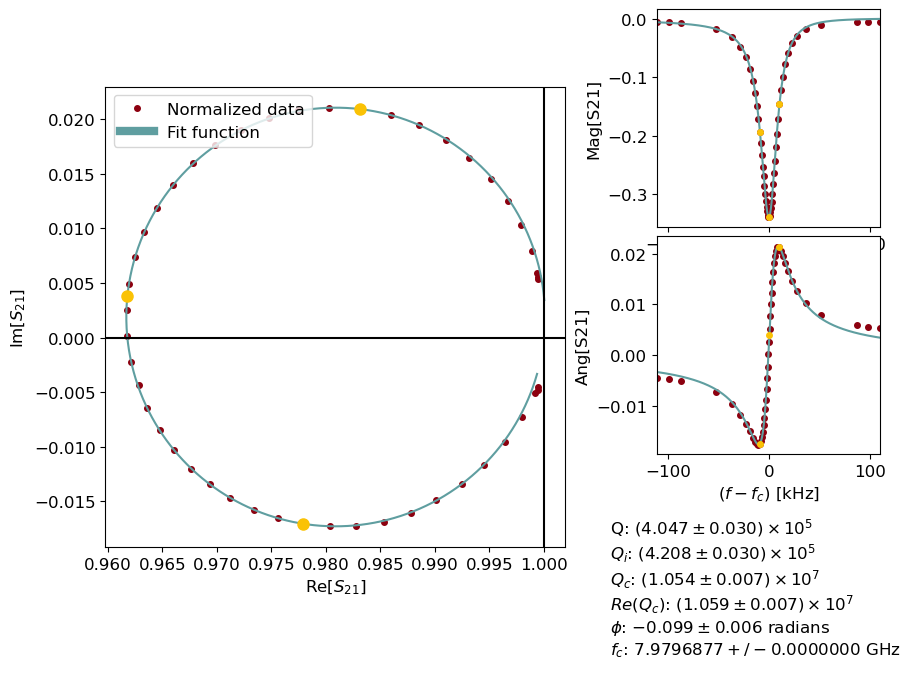

Saved fit results for frequency 7979.688000 MHz, power 6 dBm to CSV
Averaging factor: 0.670
Pin -70.0, N photons: 1.2e+06, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.54 min, expected time: 0.24 min


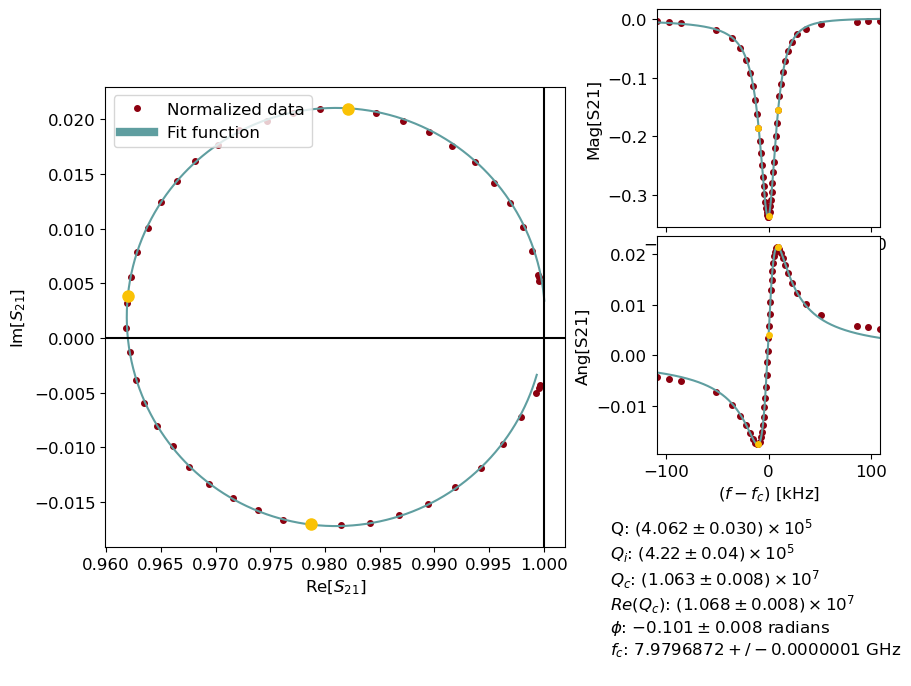

Saved fit results for frequency 7979.687000 MHz, power 3 dBm to CSV
Averaging factor: 1.342
Pin -73.0, N photons: 6.01e+05, navg: 0
Next time: 0.00 min, q_adj: 1.004
Time elapsed: 0.54 min, expected time: 0.24 min


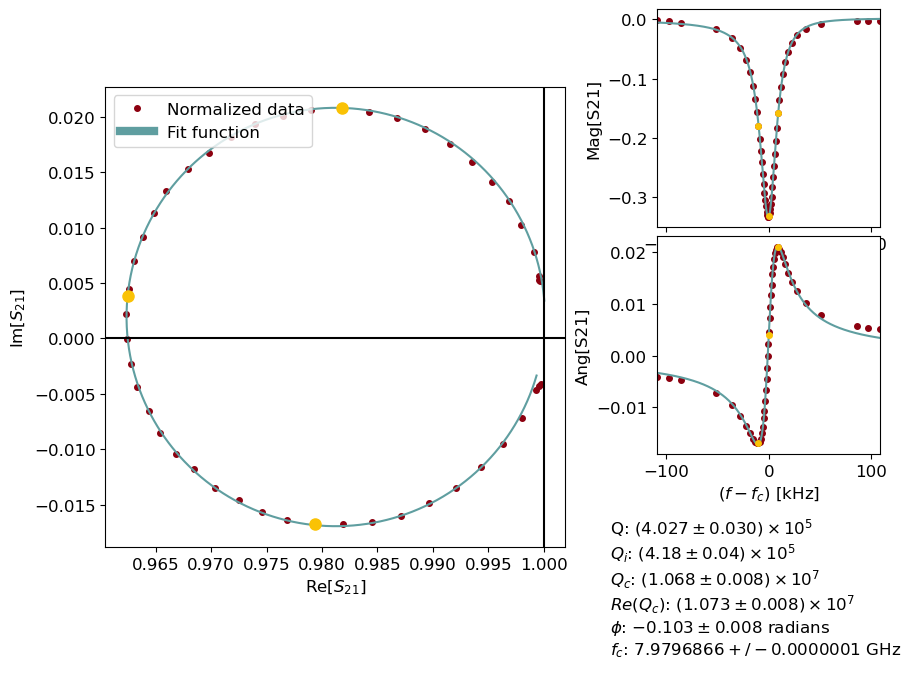

Saved fit results for frequency 7979.687000 MHz, power 0 dBm to CSV
Averaging factor: 2.737
Pin -76.0, N photons: 2.95e+05, navg: 0
Next time: 0.00 min, q_adj: 0.991
Time elapsed: 0.53 min, expected time: 0.24 min


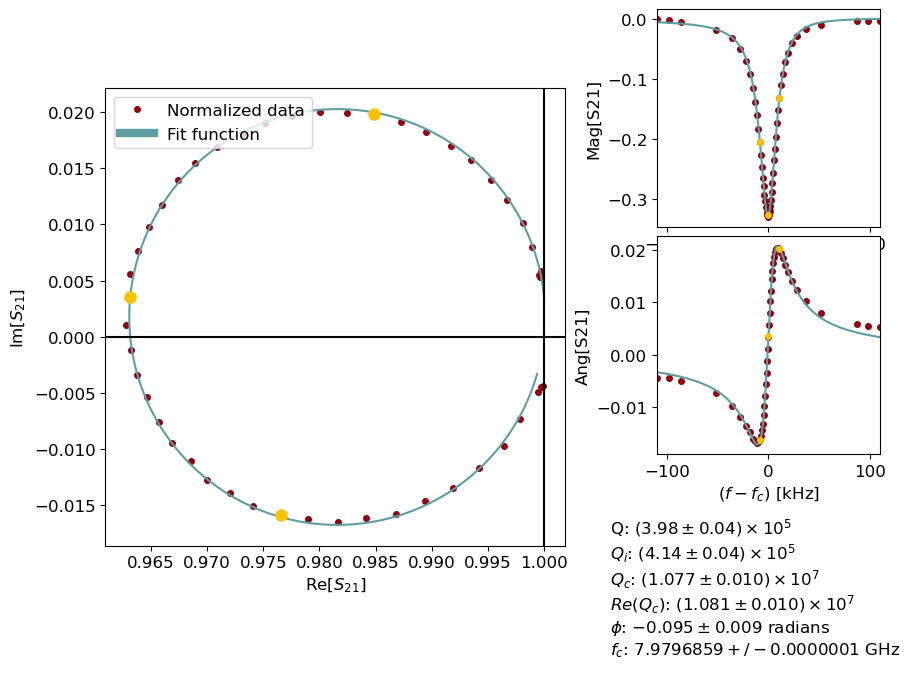

Saved fit results for frequency 7979.686000 MHz, power -3 dBm to CSV
Averaging factor: 5.664
Pin -79.0, N photons: 1.43e+05, navg: 0
Next time: 0.00 min, q_adj: 0.990
Time elapsed: 0.55 min, expected time: 0.24 min


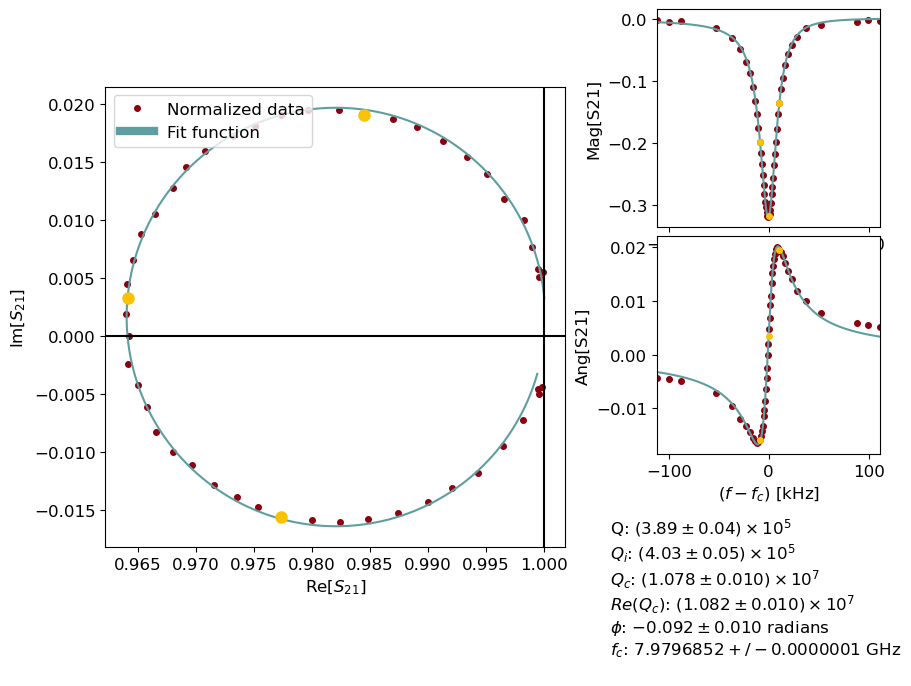

Saved fit results for frequency 7979.685000 MHz, power -6 dBm to CSV
Averaging factor: 11.958
Pin -82.0, N photons: 6.84e+04, navg: 1
Next time: 0.01 min, q_adj: 0.976
Time elapsed: 0.34 min, expected time: 0.15 min


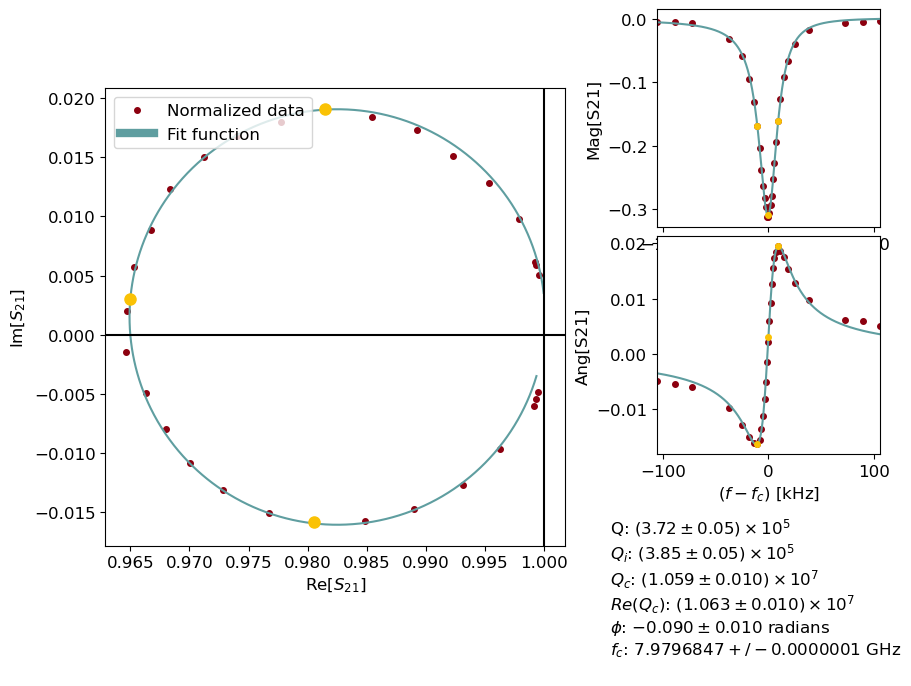

Saved fit results for frequency 7979.685000 MHz, power -9 dBm to CSV
Averaging factor: 25.236
Pin -85.0, N photons: 3.19e+04, navg: 1
Next time: 0.01 min, q_adj: 0.957
Time elapsed: 0.32 min, expected time: 0.15 min


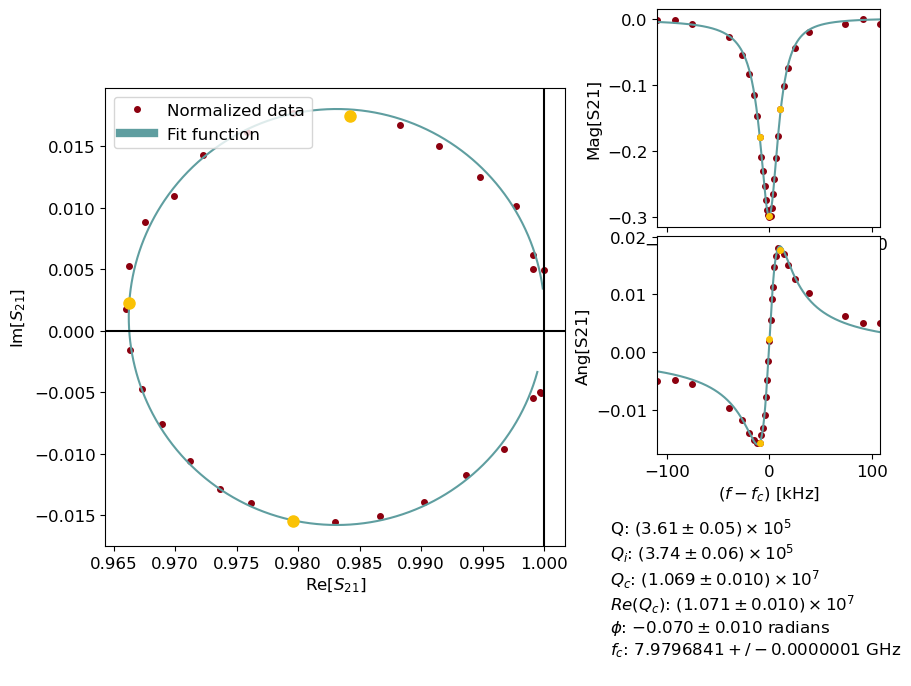

Saved fit results for frequency 7979.684000 MHz, power -12 dBm to CSV
Fit parameters: [3012536.1357  422300.0538   29922.5607       2.4788]
Averaging factor: 54.254
Pin -88.0, N photons: 1.5e+04, navg: 3
Next time: 0.01 min, q_adj: 0.971
Time elapsed: 0.34 min, expected time: 0.15 min


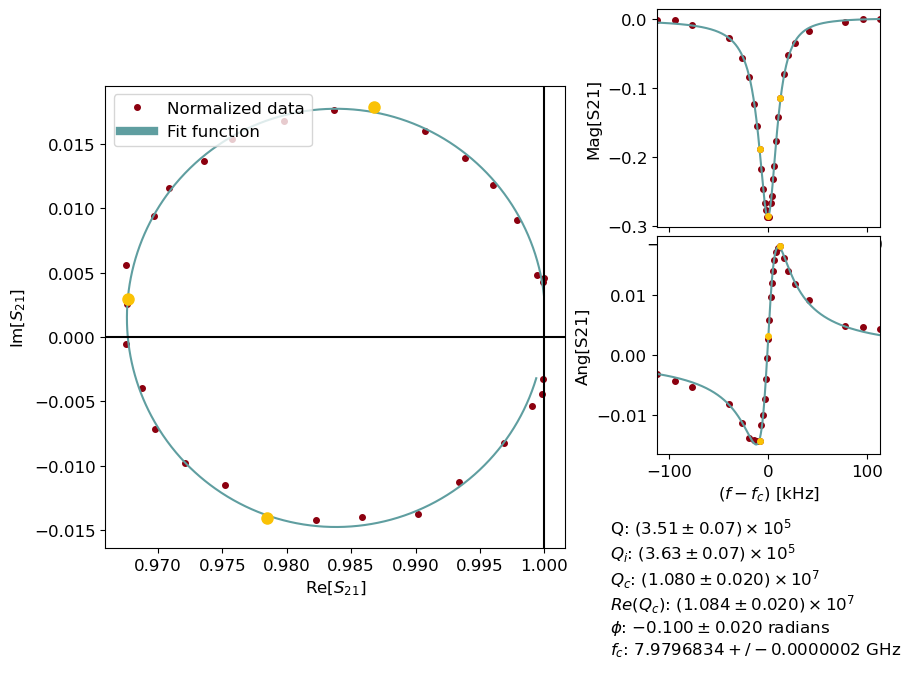

Saved fit results for frequency 7979.683000 MHz, power -15 dBm to CSV
Fit parameters: [2391602.2863  423975.1313   19537.4228       1.8955]
Averaging factor: 114.859
Pin -91.0, N photons: 6.99e+03, navg: 6
Next time: 0.03 min, q_adj: 0.971
Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.008933666249075703


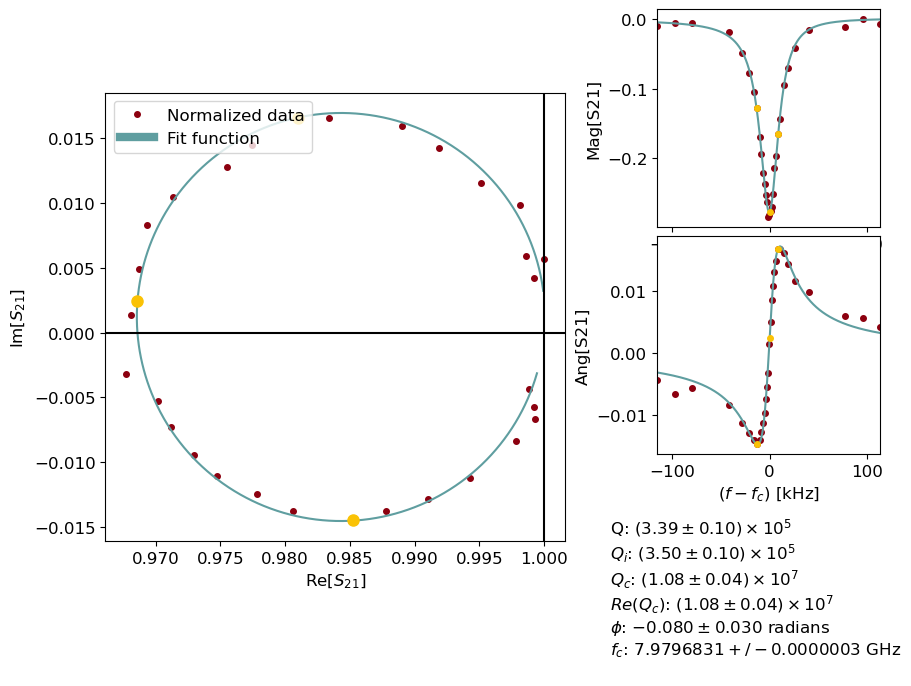

Saved fit results for frequency 7979.683000 MHz, power -18 dBm to CSV
Fit parameters: [1813901.9522  427084.5122   10200.7794       1.3867]
Averaging factor: 246.611
Pin -94.0, N photons: 3.28e+03, navg: 13
Next time: 0.07 min, q_adj: 0.966


Time elapsed: 0.35 min, expected time: 0.15 min
Qi err: 0.014203487430491527


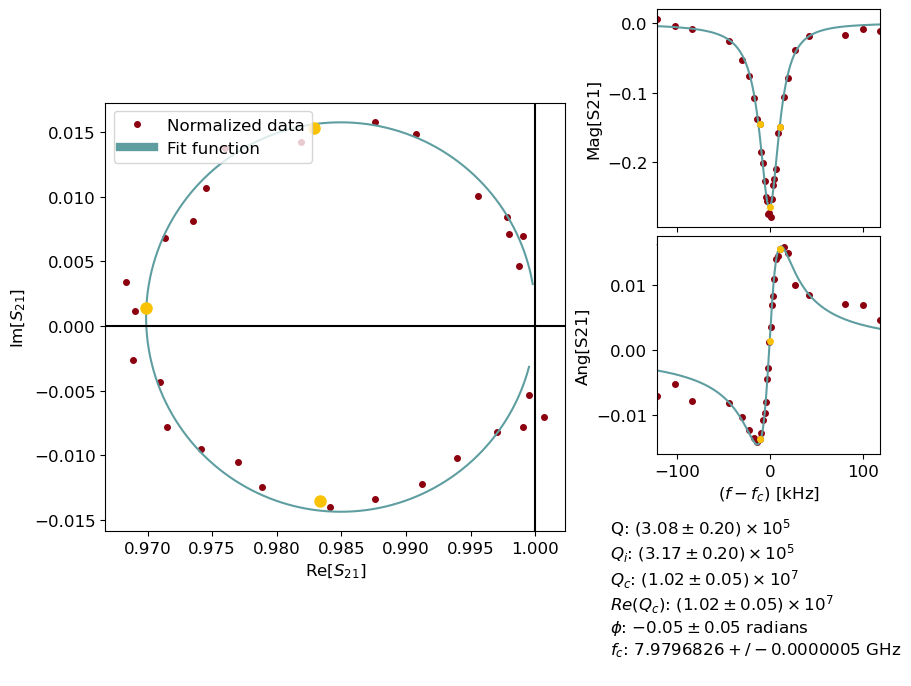

Saved fit results for frequency 7979.682000 MHz, power -21 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 540.869
Pin -97.0, N photons: 1.43e+03, navg: 33
Next time: 0.17 min, q_adj: 0.908
Time elapsed: 0.36 min, expected time: 0.17 min
Qi err: 0.005862610564425451


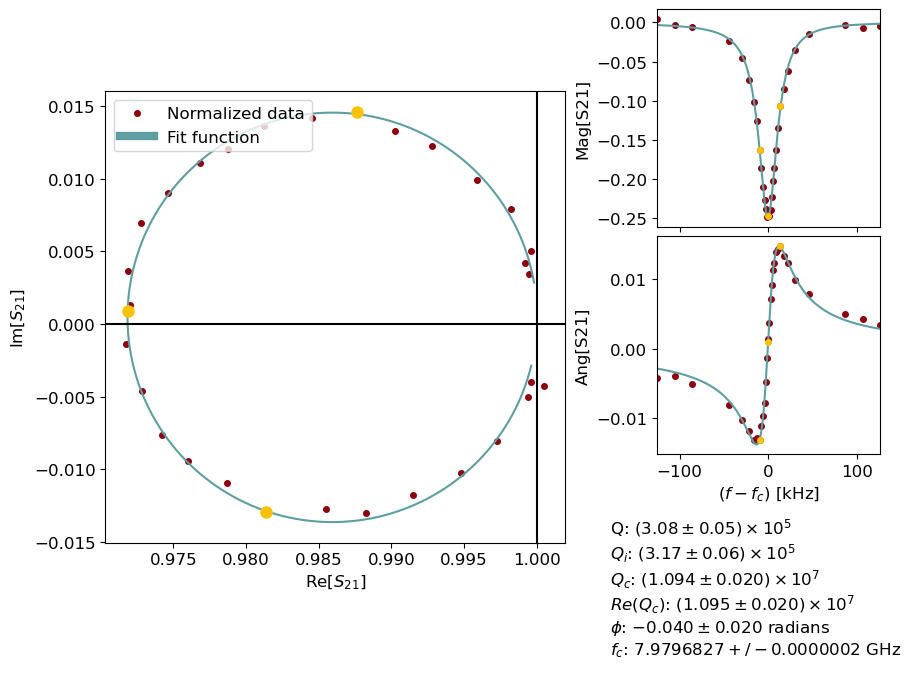

Saved fit results for frequency 7979.683000 MHz, power -24 dBm to CSV
Fit parameters: [942495.6479 432808.7076   1488.4989      0.9313]
Averaging factor: 1224.503
Pin -100.0, N photons: 671, navg: 61
Next time: 0.30 min, q_adj: 1.001
Time elapsed: 0.49 min, expected time: 0.30 min
Qi err: 0.006024619684239121


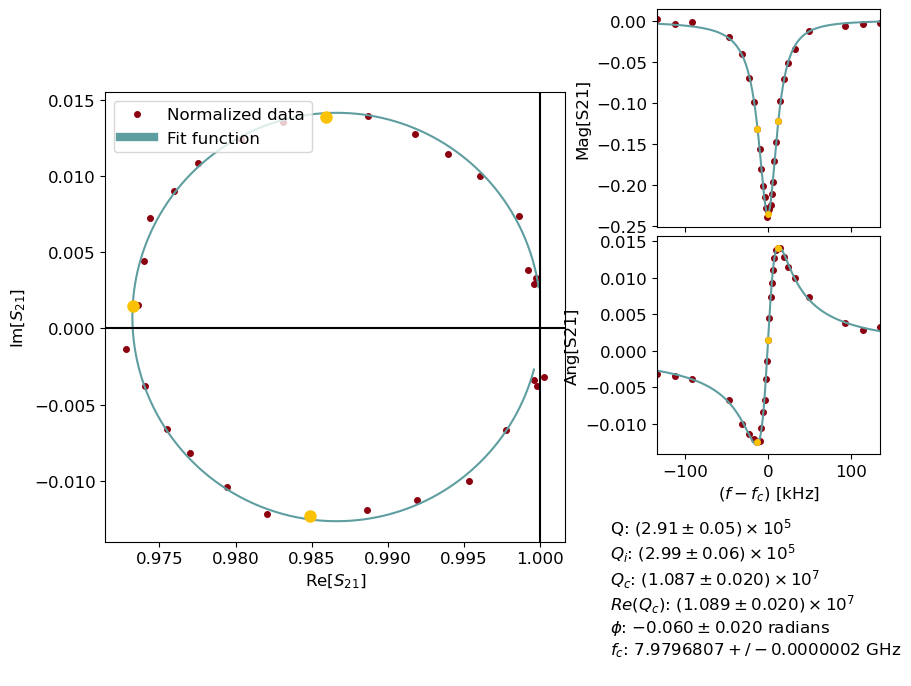

Saved fit results for frequency 7979.681000 MHz, power -27 dBm to CSV
Fit parameters: [829790.0968 435298.619     937.6801      0.85  ]
Averaging factor: 2687.952
Pin -103.0, N photons: 302, navg: 150
Next time: 0.75 min, q_adj: 0.945
Time elapsed: 0.88 min, expected time: 0.75 min
Qi err: 0.005388685070844386


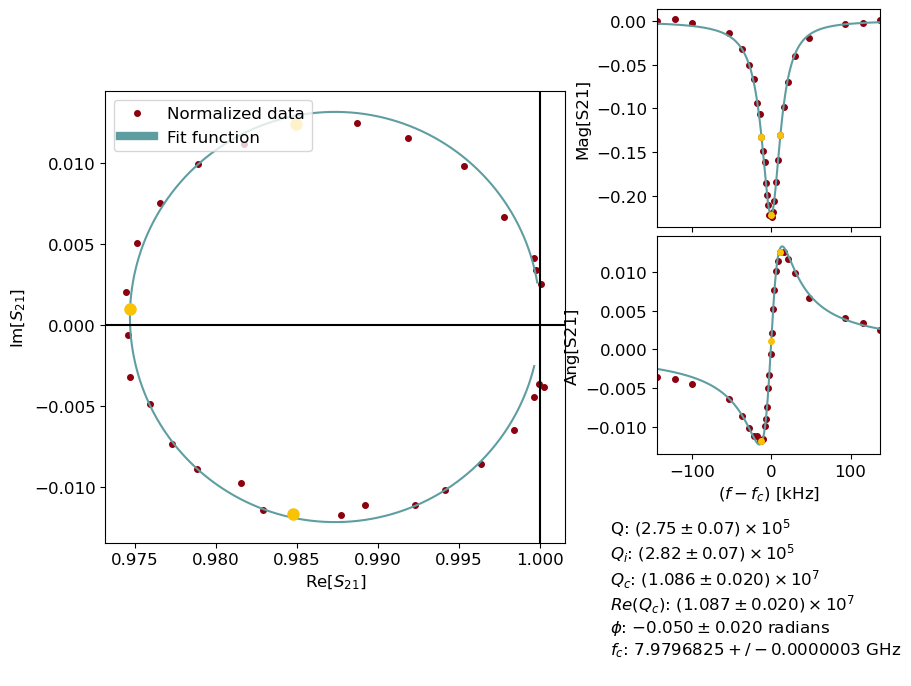

Saved fit results for frequency 7979.682000 MHz, power -30 dBm to CSV
Fit parameters: [659679.5648 441264.7518    363.5776      0.7167]
Averaging factor: 5920.680
Pin -106.0, N photons: 135, navg: 332
Next time: 1.66 min, q_adj: 0.944
Time elapsed: 1.75 min, expected time: 1.66 min
Qi err: 0.005378613719558893


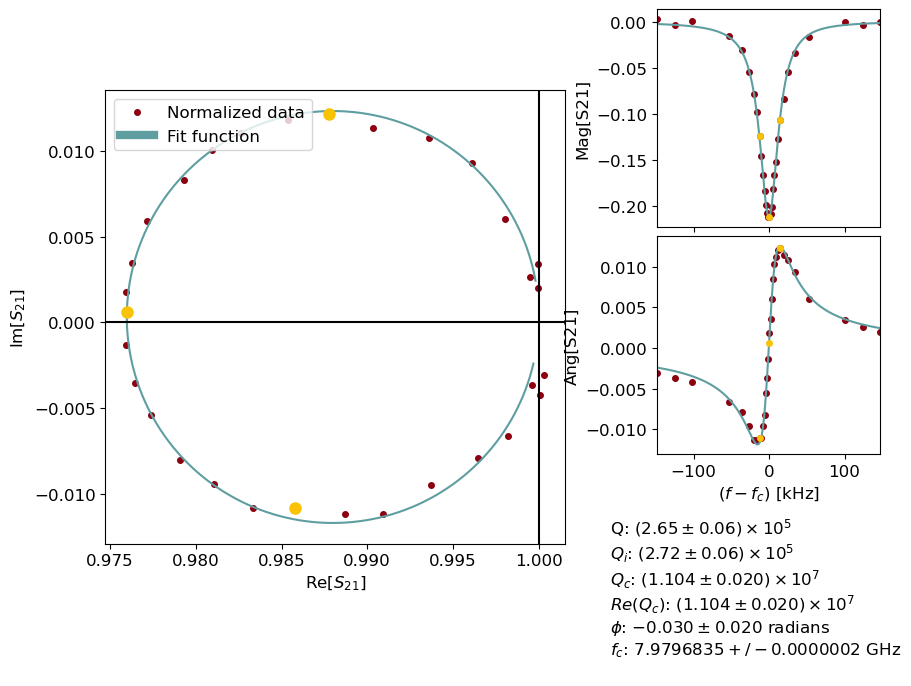

Saved fit results for frequency 7979.683000 MHz, power -33 dBm to CSV
Fit parameters: [597360.9611 444316.0475    230.5276      0.6675]
Averaging factor: 13296.231
Pin -109.0, N photons: 62, navg: 714
Next time: 3.57 min, q_adj: 0.965
Time elapsed: 3.51 min, expected time: 3.57 min
Qi err: 0.006494551032659463


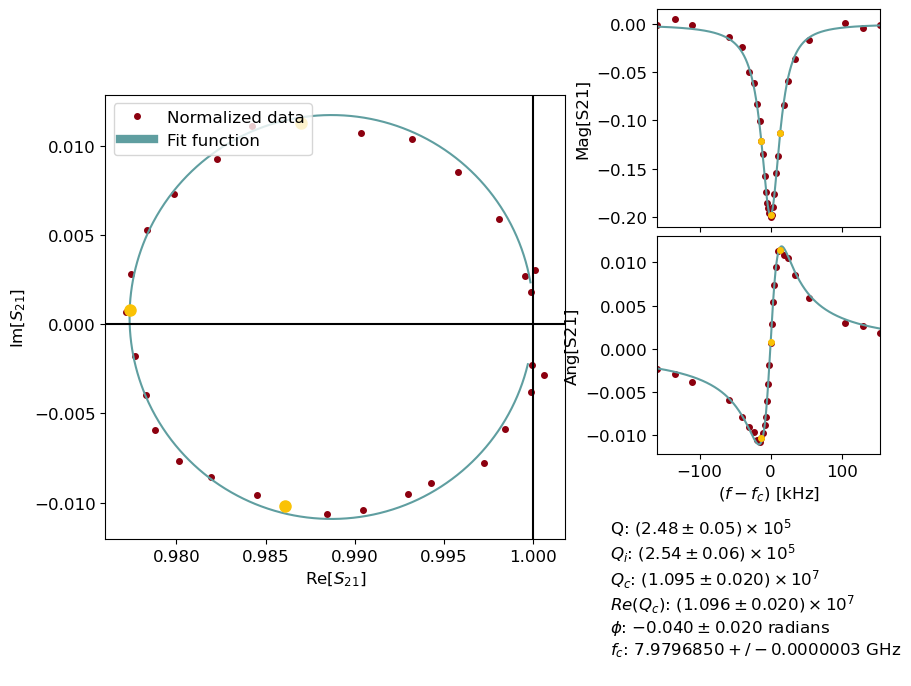

Saved fit results for frequency 7979.684000 MHz, power -36 dBm to CSV
Fit parameters: [479977.6198 452288.5713     75.6895      0.5731]
Averaging factor: 29495.214
Pin -112.0, N photons: 27.4, navg: 1687
Next time: 8.43 min, q_adj: 0.935


In [ ]:
freq_list = res_list[5:]
#freq_list = [6004000869.385187]
att = 76
for i in range(1):
    custom_config = {"freqs":np.array(freq_list), 
                 "att":att,
                 'type':'single',#'single , lin',
                 'base_path':base_path, 
                 'bandwidth':100,
                 "db_slope":5,
                 'slope':slope,
                 "span_inc":7,
                 'nvals':23,
                 "pow_start":6,
                 "avg_corr":0.05,
                 'spar':spar,
                 'npoints':25, 
                 'pow_inc':-4.125, 
                 'comment':'base temp mK'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
    config = vna_measurement.get_default_power_sweep_config(custom_config)
    results = vna_measurement.power_sweep_v2(config, VNA)
    vna_measurement.write_hp_csv(results, config)


## Fast version

Comment saved to G:/My Drive/Projects/Materials/Data/250602-ResSil6TaSQ/power_sweep_20250603_143249\comment.txt


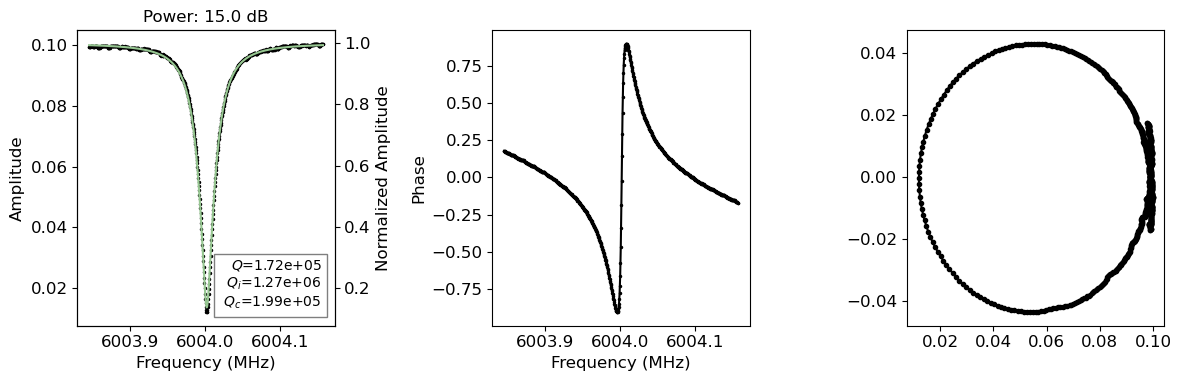

KeyboardInterrupt: 

In [42]:
freq_list = [6004000869.385187,
 6328492134.887255,
 6681207832.048611,
 7026329179.82658,
 7247004608.422264,
 7604966331.446795,
 8017990990.990991]

custom_config = {"freqs":np.array(freq_list), 
                "att":72,
                'type':'lin',#'single , lin',
                'base_path':base_path, 
                'bandwidth':100,
                "db_slope":5,
                'slope':slope,
                "span_inc":8,
                'nvals':8,
                "pow_start":15,
                "avg_corr":0.05,
                'spar':spar,
                'npoints':75, 
                'pow_inc':-4, 
                'comment':'125 mK'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
results = vna_measurement.power_sweep_v2(config, VNA)
vna_measurement.write_hp_csv(results)


In [29]:
vna_measurement.new_hp_csv(config['base_path'])

In [ ]:


qhp_list = []
for i in range(len(results.measurements)):
    q_int = [results.measurements[i][j].q_internal for j in range(len(results.measurements[i]))]
    qhp = np.max(q_int)
    qhp_list.append(qhp)

plt.figure(figsize=(8, 7))
plt.semilogy(qhp_list, 'o')
qhp_list
# Create an empty CSV file with headers if it doesn't exist
fname = os.path.join(config['base_path'], 'qhp.csv')
 # Adjust headers as needed
with open(fname, mode='a', newline='') as file:
    writer = csv.writer(file)
    now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    writer.writerow([now] + qhp_list)


## Power sweep just 1

In [ ]:
# 1
freq_list = [7029727828.725843,]

 # 1
#freq_list = [
# 6876720085.042521]
slope = -4.1534052061318027e-07 # 1 
#slope=0
#freq_list = [8045895572.786393]
# 2
#freq_list = [6727757253.626813, 6923469659.829915, 7034221985.992996, 8068307578.789394] # 2 
#freq_list = [8068307578.789394]
#slope = -4.6912118164934637e-07
#freq_list= [7034221985.992996]

# 3
# freq_list = [6015457003.501751,
#  6355251900.950475,
#  6712772761.38069,
#  #6859872161.080541,
#  7028836743.371686,
#  7163106428.2141075,
#  7543248049.024512,
#  8041999124.562282]
 # single, linear 
 # 001
custom_config = {"freqs":np.array(freq_list), 
                 "att":65,
                 'type':'lin',#'single , lin',
                 'base_path':base_path, 
                 'bandwidth':100,
                 "db_slope":7,
                 'slope':slope,
                 "span_inc":8,
                 'nvals':10,
                 "pow_start":10,
                 "avg_corr":0.1,
                 'spar':spar,
                 'npoints':100, 
                 'pow_inc':-4, 
                 'comment':'365 mK, 10 data points, warming'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
print(config)
results = vna_measurement.power_sweep_v2(config, VNA)